In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [47]:
# Day 1 - Mission statement:

# Exploring the data
# Data cleaning
    # checking for null values
    # uniformizing column names and figuring out what the column names even meeeaaaaaaaaaaan
# checking the multicollinearity
# 
#
#

In [48]:
path = ('C:/Users/camil/Documents/Courses/Ironhack/Module 1/Week 6/data_mid_bootcamp_project_FIFA_MoneyBall/')
file = os.listdir(path)
file

['.git',
 '.ipynb_checkpoints',
 'acronyms.csv',
 'data_mid_bootcamp_project_FIFA_MoneyBall',
 'FIFA project - Data Cleaning and EDA.ipynb',
 'FIFA project - exploring the data (num version).ipynb',
 'FIFA project - Modeling.ipynb',
 'FIFA-project',
 'fifa21_male2.csv',
 'positions - Copy.csv',
 'positions.csv',
 'project_details.md']

In [49]:
data = pd.DataFrame()
for file in file:
    if file.endswith('2.csv'):
        data = pd.read_csv(path + file)       
data.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

In [50]:
pd.set_option('display.max_columns', None)

In [51]:
data.shape

(17125, 107)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [53]:
data.describe()

ID           Age           OVA           BOV           POT  \
count   17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean   219388.716204     25.272934     66.965022     67.900204     72.489810   
std     37499.197507      4.942665      6.864329      6.637538      5.769949   
min         2.000000     16.000000     38.000000     42.000000     47.000000   
25%    204082.000000     21.000000     62.000000     64.000000     69.000000   
50%    228961.000000     25.000000     67.000000     68.000000     72.000000   
75%    243911.000000     29.000000     72.000000     72.000000     76.000000   
max    259105.000000     53.000000     93.000000     93.000000     95.000000   

             Growth     Attacking      Crossing     Finishing  \
count  17125.000000  17125.000000  17125.000000  17125.000000   
mean       5.524788    258.537752     51.621314     47.956672   
std        5.787539     72.255687     17.875715     19.391547   
min       -1.000000     33.000000      6.000000      3.000000   
25%        0.000000    232.000000     41.000000     33.000000   
50%        4.000000    271.000000     56.000000     52.000000   
75%        9.000000    306.000000     65.000000     64.000000   
max       26.000000    437.000000     94.000000     95.000000   

       Heading Accuracy  Short Passing       Volleys         Skill  \
count      17125.000000   17125.000000  17067.000000  17125.000000   
mean          53.598832      60.507620     45.005742    266.607591   
std           16.947164      13.960635     17.729483     76.809344   
min            5.000000       7.000000      4.000000     43.000000   
25%           46.000000      56.000000     32.000000    232.000000   
50%           57.000000      63.000000     46.000000    279.000000   
75%           65.000000      69.000000     59.000000    319.000000   
max           93.000000      94.000000     90.000000    470.000000   

          Dribbling         Curve   FK Accuracy  Long Passing  Ball Control  \
count  17125.000000  17067.000000  17125.000000  17125.000000  17125.000000   
mean      57.846423     49.574676     44.387270     54.324321     60.642803   
std       18.047250     18.188344     17.504128     14.856911     15.873647   
min        5.000000      4.000000      5.000000      9.000000      5.000000   
25%       53.000000     37.000000     32.000000     45.000000     57.000000   
50%       63.000000     51.000000     43.000000     57.000000     64.000000   
75%       70.000000     64.000000     58.000000     65.000000     70.000000   
max       96.000000     94.000000     94.000000     93.000000     96.000000   

           Movement  Acceleration  Sprint Speed       Agility     Reactions  \
count  17125.000000  17125.000000  17125.000000  17067.000000  17125.000000   
mean     322.693664     65.445898     65.443036     64.602273     62.924847   
std       54.933593     14.657889     14.437377     14.372443      9.037279   
min      113.000000     12.000000     11.000000     14.000000     24.000000   
25%      294.000000     58.000000     59.000000     57.000000     57.000000   
50%      331.000000     68.000000     68.000000     67.000000     63.000000   
75%      360.000000     75.000000     75.000000     75.000000     69.000000   
max      464.000000     97.000000     96.000000     96.000000     96.000000   

            Balance         Power    Shot Power       Jumping       Stamina  \
count  17067.000000  17125.000000  17125.000000  17067.000000  17125.000000   
mean      64.715591    302.414774     59.711416     65.170212     63.309606   
std       14.031563     49.380576     13.417931     11.918063     15.313272   
min       17.000000    128.000000     12.000000     22.000000     11.000000   
25%       57.000000    272.000000     50.000000     58.000000     56.000000   
50%       67.000000    308.000000     61.000000     66.000000     66.000000   
75%       75.000000    339.000000     70.000000     73.000000     73.000000   
max       97.000000    4

In [54]:
data.columns = [column.lower().replace(" ", "_").replace("&","and") for column in data.columns] 
data.head()

id         name  age  ova            nationality           club  bov   bp  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       position                                       player_photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          club_logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                flag_photo  pot          team_and_contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  height  weight   foot  growth        joined loan_date_end  value  wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  release_clause     contract  attacking  crossing  finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   fk_accuracy  long_passing  ball_control  movement  acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   stamina  strength  long_shots  mentality  aggression  interceptions  \
0       69        68          68        320          72           69

In [55]:
for col_name in data.columns: 
    print(col_name)

id
name
age
ova
nationality
club
bov
bp
position
player_photo
club_logo
flag_photo
pot
team_and_contract
height
weight
foot
growth
joined
loan_date_end
value
wage
release_clause
contract
attacking
crossing
finishing
heading_accuracy
short_passing
volleys
skill
dribbling
curve
fk_accuracy
long_passing
ball_control
movement
acceleration
sprint_speed
agility
reactions
balance
power
shot_power
jumping
stamina
strength
long_shots
mentality
aggression
interceptions
positioning
vision
penalties
composure
defending
marking
standing_tackle
sliding_tackle
goalkeeping
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes
total_stats
base_stats
w/f
sm
a/w
d/w
ir
pac
sho
pas
dri
def
phy
hits
ls
st
rs
lw
lf
cf
rf
rw
lam
cam
ram
lm
lcm
cm
rcm
rm
lwb
ldm
cdm
rdm
rwb
lb
lcb
cb
rcb
rb
gk
gender


In [56]:
for col in data.columns:
    if data[col].isna().sum() > 0:
        print(col, ": ", data[col].isna().sum(), "NaN")

club :  23 NaN
position :  413 NaN
club_logo :  23 NaN
joined :  58 NaN
loan_date_end :  16215 NaN
volleys :  58 NaN
curve :  58 NaN
agility :  58 NaN
balance :  58 NaN
jumping :  58 NaN
interceptions :  7 NaN
positioning :  7 NaN
vision :  58 NaN
composure :  423 NaN
sliding_tackle :  58 NaN
a/w :  89 NaN
d/w :  89 NaN


In [57]:
data[data.columns[data.isna().any()]]

club      position  \
0            Udinese            LM   
1          KAS Eupen    CM CAM CDM   
2      Coventry City  CAM RM RW LM   
3         Sunderland           NaN   
4        Vissel Kobe        CM CAM   
...              ...           ...   
17120     CD Tondela            CB   
17121        Burnley        CAM CM   
17122        Burnley            RB   
17123  SK Sturm Graz         RB LB   
17124          Lecce            ST   

                                              club_logo        joined  \
0          https://cdn.sofifa.com/teams/55/light_60.png   Jul 1, 2008   
1        https://cdn.sofifa.com/teams/2013/light_60.png  Jul 19, 2014   
2        https://cdn.sofifa.com/teams/1800/light_60.png   Jan 7, 2016   
3         https://cdn.sofifa.com/teams/106/light_60.png           NaN   
4      https://cdn.sofifa.com/teams/101146/light_60.png  Jul 16, 2018   
...                                                 ...           ...   
17120  https://cdn.sofifa.com/teams/112516/light_60.png  Sep 29, 2020   
17121    https://cdn.sofifa.com/teams/1796/light_60.png  Aug 20, 2020   
17122    https://cdn.sofifa.com/teams/1796/light_60.png  Aug 20, 2020   
17123     https://cdn.sofifa.com/teams/209/light_60.png  Sep 30, 2020   
17124     https://cdn.sofifa.com/teams/347/light_60.png  Sep 30, 2020   

      loan_date_end  volleys  curve  agility  balance  jumping  interceptions  \
0               NaN     58.0   65.0     68.0     68.0     68.0           69.0   
1               NaN     68.0   79.0     62.0     72.0     54.0           71.0   
2               NaN     75.0   84.0     71.0     75.0     58.0           39.0   
3               NaN      NaN    NaN      NaN      NaN      NaN           70.0   
4               NaN     79.0   80.0     79.0     75.0     40.0           70.0   
...             ...      ...    ...      ...      ...      ...            ...   
17120  Jun 30, 2021     26.0   26.0     46.0     42.0     70.0           58.0   
17121           NaN     41.0   42.0     52.0     68.0     62.0           50.0   
17122           NaN     34.0   43.0     54.0     68.0     61.0           55.0   
17123           NaN     23.0   43.0     74.0     77.0     72.0           58.0   
17124           NaN     54.0   45.0     59.0     65.0     62.0           11.0   

       positioning  vision  composure  sliding_tackle     a/w     d/w  
0             63.0    66.0        NaN            69.0  Medium    High  
1             72.0    73.0       79.0            40.0  Medium  Medium  
2             69.0    74.0        NaN            30.0  Medium     Low  
3             72.0     NaN        NaN             NaN     NaN     NaN  
4             78.0    93.0       89.0            56.0    High  Medium  
...            ...     ...        ...             ...     ...     ...  
17120         23.0    29.0       46.0            66.0  Medium  Medium  
17121         55.0    53.0       46.0            56.0  Medium  Medium  
17122         49.0    45.0       43.0            54.0  Medium  Medium  
17123         46.0    56.0       54.0            61.0    High  Medium  
17124         64.0    50.0       57.0            11.0    High  Medium  

[17125 rows x 17 columns]

In [58]:
round((data["loan_date_end"].isna().sum())/(len(data["loan_date_end"]))*100,0) # we can drop that column

95.0

In [59]:
# Are there other columns that can be dropped?
# # player_photo, club_logo, flag_photo, they are photo we don't need 
# # gender: should only be one unique value:
data['gender'].unique()

array(['Male'], dtype=object)

In [60]:
data = data.drop(["loan_date_end", "player_photo", "club_logo", "flag_photo", "gender","team_and_contract"], axis=1)

In [61]:
data.shape

(17125, 101)

In [62]:
# Setting ID as the index but first checking that there are only unique values there
print(data.id.nunique())
print(len(data.id))

17125
17125


In [63]:
data = data.set_index('id')
data.head()

name  age  ova            nationality           club  bov   bp  \
id                                                                          
2   G. Pasquale   33   69                  Italy        Udinese   71  LWB   
16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
27      J. Cole   33   71                England  Coventry City   71  CAM   
36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

        position  pot height  weight   foot  growth        joined  value  \
id                                                                         
2             LM   69   6'0"  181lbs   Left       0   Jul 1, 2008  €625K   
16    CM CAM CDM   71  5'10"  143lbs  Right       0  Jul 19, 2014  €600K   
27  CAM RM RW LM   71   5'9"  161lbs  Right       0   Jan 7, 2016  €1.1M   
36           NaN   82  5'11"  165lbs  Right      14           NaN     €0   
41        CM CAM   81   5'7"  150lbs  Right       0  Jul 16, 2018  €5.5M   

    wage release_clause     contract  attacking  crossing  finishing  \
id                                                                     
2    €7K             €0  2008 ~ 2016        313        75         50   
16   €7K          €1.1M  2014 ~ 2019        337        68         64   
27  €15K             €0  2016 ~ 2020        337        80         64   
36    €0             €0         2009        264        54         70   
41  €12K          €7.2M  2018 ~ 2021        367        75         69   

    heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
id                                                                      
2                 59             71     58.0    338         73   65.0   
16                61             76     68.0    369         69   79.0   
27                41             77     75.0    387         79   84.0   
36                60             80      NaN    255         68    NaN   
41                54             90     79.0    408         85   80.0   

    fk_accuracy  long_passing  ball_control  movement  acceleration  \
id                                                                    
2            60            69            71       347            68   
16           79            71            71       305            56   
27           77            69            78       295            48   
36           46            64            77       176            59   
41           70            83            90       346            61   

    sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
id                                                                          
2             74     68.0         69     68.0    347          74     68.0   
16            50     62.0         65     72.0    324          75     54.0   
27            42     71.0         59     75.0    284          72     58.0   
36            62      NaN         55      NaN    239          63      NaN   
41            56     79.0         75     75.0    297          67     40.0   

    stamina  strength  long_shots  mentality  aggression  interceptions  \
id                                                                        
2        69        68          68        320          72           69.0   
16       64        60          71        362          71           71.0   
27       29        56          69        317          69           39.0   
36       51        66          59        271          59           70.0   
41       58        62          70        370          58           70.0   

    positioning  vision  penalties  composure  defending  marking  \
id                                                                  
2          63.0    66.0         50        NaN        208       70   
16         72.0    73.0         75       79.0        153       70   
27         69.0    74.0         66        NaN         99       35   
36         7

In [64]:
# We want to rename the positions to make it more readable for us, as football laypersons
# So we get a csv file that we created and will turn into a dictionary
positions = pd.read_csv('C:/Users/camil/Documents/Courses/Ironhack/Module 1/Week 6/data_mid_bootcamp_project_FIFA_MoneyBall/positions.csv', header=None, index_col=0)
positions

1
0                              
ova               overall_score
bov                best_overall
bp                best_position
pot             potential_score
foot             preferred_foot
w/f                   weak_foot
sm                  skill_moves
a/w                    away_win
d/w                  draw_games
ir     international_reputation
pac                        pace
sho                    shooting
pas                     passing
dri                     dribble
def                      defend
phy                    physical
hits                       hits
ls                 left_striker
st                      striker
rs                right_striker
lw                  left_winger
lf                 left_forward
cf               center_forward
rf                right_forward
rw                 right_winger
lam     left_attacking_midfield
cam   center_attacking_midfield
ram    right_attacking_midfield
lm              left_midfielder
lcm        left_center_midfield
cm              center_midfield
rcm       right_center_midfield
rm             right_midfielder
lwb              left_wing_back
ldm     left_defensive_midfield
cdm   center_defensive_midfield
rdm    right_defensive_midfield
rwb             right_wing_back
lb                    left_back
lcb            left_center_back
cb                  center_back
rcb           right_center_back
rb                   right_back
gk                   goalkeeper

In [65]:
positions = positions.squeeze().to_dict()

In [66]:
positions

{'ova': 'overall_score',
 'bov': 'best_overall',
 'bp': 'best_position',
 'pot': 'potential_score',
 'foot': 'preferred_foot',
 'w/f': 'weak_foot',
 'sm': 'skill_moves',
 'a/w': 'away_win',
 'd/w': 'draw_games',
 'ir': 'international_reputation',
 'pac': 'pace',
 'sho': 'shooting',
 'pas': 'passing',
 'dri': 'dribble',
 'def': 'defend',
 'phy': 'physical',
 'hits': 'hits',
 'ls': 'left_striker',
 'st': 'striker',
 'rs': 'right_striker',
 'lw': 'left_winger',
 'lf': 'left_forward',
 'cf': 'center_forward',
 'rf': 'right_forward',
 'rw': 'right_winger',
 'lam': 'left_attacking_midfield',
 'cam': 'center_attacking_midfield',
 'ram': 'right_attacking_midfield',
 'lm': 'left_midfielder',
 'lcm': 'left_center_midfield',
 'cm': 'center_midfield',
 'rcm': 'right_center_midfield',
 'rm': 'right_midfielder',
 'lwb': 'left_wing_back',
 'ldm': 'left_defensive_midfield',
 'cdm': 'center_defensive_midfield',
 'rdm': 'right_defensive_midfield',
 'rwb': 'right_wing_back',
 'lb': 'left_back',
 'lcb': '

In [67]:
for column in data:
    if column in positions:
        data.rename(columns=positions, inplace=True)
data.head()

name  age  overall_score            nationality           club  \
id                                                                          
2   G. Pasquale   33             69                  Italy        Udinese   
16  Luis García   37             71                  Spain      KAS Eupen   
27      J. Cole   33             71                England  Coventry City   
36     D. Yorke   36             68  Trinidad &amp; Tobago     Sunderland   
41      Iniesta   36             81                  Spain    Vissel Kobe   

    best_overall best_position      position  potential_score height  weight  \
id                                                                             
2             71           LWB            LM               69   6'0"  181lbs   
16            70            CM    CM CAM CDM               71  5'10"  143lbs   
27            71           CAM  CAM RM RW LM               71   5'9"  161lbs   
36            70            ST           NaN               82  5'11"  165lbs   
41            82           CAM        CM CAM               81   5'7"  150lbs   

   preferred_foot  growth        joined  value  wage release_clause  \
id                                                                    
2            Left       0   Jul 1, 2008  €625K   €7K             €0   
16          Right       0  Jul 19, 2014  €600K   €7K          €1.1M   
27          Right       0   Jan 7, 2016  €1.1M  €15K             €0   
36          Right      14           NaN     €0    €0             €0   
41          Right       0  Jul 16, 2018  €5.5M  €12K          €7.2M   

       contract  attacking  crossing  finishing  heading_accuracy  \
id                                                                  
2   2008 ~ 2016        313        75         50                59   
16  2014 ~ 2019        337        68         64                61   
27  2016 ~ 2020        337        80         64                41   
36         2009        264        54         70                60   
41  2018 ~ 2021        367        75         69                54   

    short_passing  volleys  skill  dribbling  curve  fk_accuracy  \
id                                                                 
2              71     58.0    338         73   65.0           60   
16             76     68.0    369         69   79.0           79   
27             77     75.0    387         79   84.0           77   
36             80      NaN    255         68    NaN           46   
41             90     79.0    408         85   80.0           70   

    long_passing  ball_control  movement  acceleration  sprint_speed  agility  \
id                                                                              
2             69            71       347            68            74     68.0   
16            71            71       305            56            50     62.0   
27            69            78       295            48            42     71.0   
36            64            77       176            59            62      NaN   
41            83            90       346            61            56     79.0   

    reactions  balance  power  shot_power  jumping  stamina  strength  \
id                                                                      
2          69     68.0    347          74     68.0       69        68   
16         65     72.0    324          75     54.0       64        60   
27         59     75.0    284          72     58.0       29        56   
36         55      NaN    239          63      NaN       51        66   
41         75     75.0    297          67     40.0       58        62   

    long_shots  mentality  aggression  interceptions  positioning  vision  \
id                                                                          
2           68        320          72           69.0         63.0    66.0   
16          71        362          71           71.0         72.0    73.0   
27          69        317          69           39.0         69

In [68]:
# Cleaning the numerical data

In [69]:
# cleaning height
data['height']

id
2          6'0"
16        5'10"
27         5'9"
36        5'11"
41         5'7"
          ...  
259088     6'6"
259090    5'10"
259091     5'9"
259101     5'9"
259105    5'10"
Name: height, Length: 17125, dtype: object

In [70]:
# CLEANING THE HEIGHT
def convert_height(i):
    to_cm = 2.54
    x = i.replace("'"," ")
    x2 = x.replace('"','') 
    #have to do it in two part because different quote used for inch and foot which causes problem with the string
    y = x2.split()
    height = round(((float(y[0])*12)+float(y[1]))*to_cm,0)
    return height

In [71]:
data['height'] = data['height'].apply(convert_height)
data['height']

id
2         183.0
16        178.0
27        175.0
36        180.0
41        170.0
          ...  
259088    198.0
259090    178.0
259091    175.0
259101    175.0
259105    178.0
Name: height, Length: 17125, dtype: float64

In [72]:
# CLEANING THE WEIGHT
def clean_weight(i):
    x = float(i.replace('lbs',''))
    return x

In [73]:
data["weight"] = data["weight"].apply(clean_weight)
data["weight"]

id
2         181.0
16        143.0
27        161.0
36        165.0
41        150.0
          ...  
259088    165.0
259090    170.0
259091    154.0
259101    148.0
259105    154.0
Name: weight, Length: 17125, dtype: float64

In [74]:
# CLEANING VALUE
def clean_value(i):
    x = float(i.replace(".","").replace("€","").replace("K","000").replace("M","00000"))
    return x

In [75]:
data['value'] = data['value'].apply(clean_value)
data['value']

id
2          625000.0
16         600000.0
27        1100000.0
36              0.0
41        5500000.0
            ...    
259088     550000.0
259090     130000.0
259091     130000.0
259101     475000.0
259105     325000.0
Name: value, Length: 17125, dtype: float64

In [76]:
# CLEANING WAGE AND RELEASE CLAUSE
data['wage'] = data['wage'].apply(clean_value)
data['wage']

id
2          7000.0
16         7000.0
27        15000.0
36            0.0
41        12000.0
           ...   
259088     2000.0
259090     3000.0
259091     2000.0
259101     3000.0
259105     2000.0
Name: wage, Length: 17125, dtype: float64

In [77]:
data['release_clause'] = data['release_clause'].apply(clean_value)
data['release_clause']

id
2               0.0
16        1100000.0
27              0.0
36              0.0
41        7200000.0
            ...    
259088          0.0
259090     273000.0
259091     273000.0
259101     784000.0
259105     788000.0
Name: release_clause, Length: 17125, dtype: float64

In [78]:
# CLEANING THE POSITIONS
def cleaning_positions(i):
    x = float(i.replace("+",".").replace("-",""))
    return x

In [79]:
for col in data.loc[:, 'left_striker':'goalkeeper']:
    data[col] = data[col].apply(cleaning_positions)
data.head()

name  age  overall_score            nationality           club  \
id                                                                          
2   G. Pasquale   33             69                  Italy        Udinese   
16  Luis García   37             71                  Spain      KAS Eupen   
27      J. Cole   33             71                England  Coventry City   
36     D. Yorke   36             68  Trinidad &amp; Tobago     Sunderland   
41      Iniesta   36             81                  Spain    Vissel Kobe   

    best_overall best_position      position  potential_score  height  weight  \
id                                                                              
2             71           LWB            LM               69   183.0   181.0   
16            70            CM    CM CAM CDM               71   178.0   143.0   
27            71           CAM  CAM RM RW LM               71   175.0   161.0   
36            70            ST           NaN               82   180.0   165.0   
41            82           CAM        CM CAM               81   170.0   150.0   

   preferred_foot  growth        joined      value     wage  release_clause  \
id                                                                            
2            Left       0   Jul 1, 2008   625000.0   7000.0             0.0   
16          Right       0  Jul 19, 2014   600000.0   7000.0       1100000.0   
27          Right       0   Jan 7, 2016  1100000.0  15000.0             0.0   
36          Right      14           NaN        0.0      0.0             0.0   
41          Right       0  Jul 16, 2018  5500000.0  12000.0       7200000.0   

       contract  attacking  crossing  finishing  heading_accuracy  \
id                                                                  
2   2008 ~ 2016        313        75         50                59   
16  2014 ~ 2019        337        68         64                61   
27  2016 ~ 2020        337        80         64                41   
36         2009        264        54         70                60   
41  2018 ~ 2021        367        75         69                54   

    short_passing  volleys  skill  dribbling  curve  fk_accuracy  \
id                                                                 
2              71     58.0    338         73   65.0           60   
16             76     68.0    369         69   79.0           79   
27             77     75.0    387         79   84.0           77   
36             80      NaN    255         68    NaN           46   
41             90     79.0    408         85   80.0           70   

    long_passing  ball_control  movement  acceleration  sprint_speed  agility  \
id                                                                              
2             69            71       347            68            74     68.0   
16            71            71       305            56            50     62.0   
27            69            78       295            48            42     71.0   
36            64            77       176            59            62      NaN   
41            83            90       346            61            56     79.0   

    reactions  balance  power  shot_power  jumping  stamina  strength  \
id                                                                      
2          69     68.0    347          74     68.0       69        68   
16         65     72.0    324          75     54.0       64        60   
27         59     75.0    284          72     58.0       29        56   
36         55      NaN    239          63      NaN       51        66   
41         75     75.0    297          67     40.0       58        62   

    long_shots  mentality  aggression  interceptions  positioning  vision  \
id                                                                          
2           68        320          72           69.0         63.0    66.0   
16          71        362          71           71.0         72.0    73.0   


In [80]:
# Checking that there are no numerical data still classified as object
for col in data.columns:
    print(col, ":", data[col].dtypes)
# hits is still an object, to be changed into numerical

name : object
age : int64
overall_score : int64
nationality : object
club : object
best_overall : int64
best_position : object
position : object
potential_score : int64
height : float64
weight : float64
preferred_foot : object
growth : int64
joined : object
value : float64
wage : float64
release_clause : float64
contract : object
attacking : int64
crossing : int64
finishing : int64
heading_accuracy : int64
short_passing : int64
volleys : float64
skill : int64
dribbling : int64
curve : float64
fk_accuracy : int64
long_passing : int64
ball_control : int64
movement : int64
acceleration : int64
sprint_speed : int64
agility : float64
reactions : int64
balance : float64
power : int64
shot_power : int64
jumping : float64
stamina : int64
strength : int64
long_shots : int64
mentality : int64
aggression : int64
interceptions : float64
positioning : float64
vision : float64
penalties : int64
composure : float64
defending : int64
marking : int64
standing_tackle : int64
sliding_tackle : float64
goa

In [81]:
data['hits'] = pd.to_numeric(data['hits'], errors='coerce')
data['hits']

id
2           4.0
16          4.0
27         11.0
36          3.0
41        149.0
          ...  
259088      5.0
259090      5.0
259091      3.0
259101      5.0
259105      4.0
Name: hits, Length: 17125, dtype: float64

In [82]:
# CLEANING CATEGORICAL DATA
# starred data cleaning (you can also have one for loop if I think about it now, this is just how I went thinking about it)
star_columns = ['weak_foot', 'skill_moves', 'international_reputation']

# Check unique values
# Select only the first character from the string
# Convert data type from object to integer
# Check that the transformation was successful
for column in star_columns:
    print(data[column].unique())
    data[column] = data[column].str[0]
    data[column] = pd.to_numeric(data[column], errors='raise')
    print(data[column].dtypes)

['3 ★' '4 ★' '2 ★' '1 ★' '5 ★']
int64
['2★' '3★' '4★' '1★' '5★']
int64
['2 ★' '1 ★' '4 ★' '3 ★' '5 ★']
int64


In [83]:
data['nationality'].unique()
# remove &amp;
# change China PR to China
# DR Congo to Democratic Republic of the Congo
# DPR Korea to North Korea

array(['Italy', 'Spain', 'England', 'Trinidad &amp; Tobago', 'Germany',
       'Turkey', 'Wales', 'Republic of Ireland', 'Nigeria', 'Brazil',
       'Australia', 'Hungary', 'Argentina', 'Portugal', 'Netherlands',
       'France', 'Norway', 'Tunisia', 'Bulgaria', 'Poland',
       'United States', 'Mali', 'Finland', 'Iceland', 'Czech Republic',
       'Serbia', 'Sweden', 'Georgia', 'Denmark', 'Senegal', 'Israel',
       'Cameroon', 'Greece', 'Scotland', 'Ukraine', 'China PR',
       'Colombia', 'Belgium', 'Ivory Coast', 'Switzerland', 'Canada',
       'Chile', 'Peru', 'Paraguay', 'Mexico', 'Japan', 'Ghana',
       'Korea Republic', 'Belarus', 'Egypt', 'Congo', 'Uruguay',
       'South Africa', 'Northern Ireland', 'Togo', 'Jamaica', 'Austria',
       'Algeria', 'Morocco', 'Albania', 'North Macedonia', 'Slovenia',
       'Madagascar', 'Croatia', 'Kosovo', 'Estonia', 'Moldova',
       'Bosnia Herzegovina', 'Russia', 'Romania', 'DR Congo',
       'Antigua &amp; Barbuda', 'Burkina Faso', 'Pan

In [84]:
data["nationality"] = data["nationality"].apply(lambda x: "Democratic Republic of the Congo" if str(x).startswith("DR")
                                                 else "North Korea" if str(x).endswith("DPR")
                                                 else "China" if str(x).endswith("PR")
                                                 else str(x).replace("&amp;","and") if "&amp;" in x
                                                 else x)
data['nationality'].unique()

array(['Italy', 'Spain', 'England', 'Trinidad and Tobago', 'Germany',
       'Turkey', 'Wales', 'Republic of Ireland', 'Nigeria', 'Brazil',
       'Australia', 'Hungary', 'Argentina', 'Portugal', 'Netherlands',
       'France', 'Norway', 'Tunisia', 'Bulgaria', 'Poland',
       'United States', 'Mali', 'Finland', 'Iceland', 'Czech Republic',
       'Serbia', 'Sweden', 'Georgia', 'Denmark', 'Senegal', 'Israel',
       'Cameroon', 'Greece', 'Scotland', 'Ukraine', 'China', 'Colombia',
       'Belgium', 'Ivory Coast', 'Switzerland', 'Canada', 'Chile', 'Peru',
       'Paraguay', 'Mexico', 'Japan', 'Ghana', 'Korea Republic',
       'Belarus', 'Egypt', 'Congo', 'Uruguay', 'South Africa',
       'Northern Ireland', 'Togo', 'Jamaica', 'Austria', 'Algeria',
       'Morocco', 'Albania', 'North Macedonia', 'Slovenia', 'Madagascar',
       'Croatia', 'Kosovo', 'Estonia', 'Moldova', 'Bosnia Herzegovina',
       'Russia', 'Romania', 'Democratic Republic of the Congo',
       'Antigua and Barbuda', 'Bu

In [85]:
# Explore the contract data
data['contract'].unique()

# As the end of the contract is typically represented by the last 4 characters of the 
# strings, we will extract those where possible:
def clean_contract(x):
    try:
        x = int(x[-4:])
    except:
        pass
    return x

data['contract'] = data['contract'].apply(clean_contract)

# Check what non-integer values remained in the column:
data['contract'].unique()

array([2016, 2019, 2020, 2009, 2021, 2012, 2014, 2011, 2013,
       'England Free', 2022, 2008, 2010, 'Free', 2007, 2017,
       'France Free', 2018, 2023, 2015, 'Australia Free',
       'Czech Republic Free', 'United States Free', 'Ivory Coast Free',
       'Bari Jun 30, 2018 On Loan', 'Jun 30, 2014 On Loan',
       'Jun 30, 2018 On Loan', 2024, 2025, 'Jun 30, 2021 On Loan',
       'Germany Free', 'Brazil Free', 'Jun 30, 2015 On Loan',
       'May 31, 2021 On Loan', 'DR Congo Free', 'Jun 30, 2019 On Loan',
       'May 31, 2018 On Loan', 'May 31, 2019 On Loan',
       'Jun 30, 2017 On Loan', 'Argentina Free',
       'CD Mirandés Jun 30, 2017 On Loan', 'Dec 31, 2020 On Loan', 1648,
       2006, 'Jun 30, 2020 On Loan', 'Jan 30, 2021 On Loan',
       'Jun 30, 2016 On Loan', 'Aug 31, 2020 On Loan',
       'Jan 1, 2021 On Loan', 'Dec 31, 2021 On Loan', 'India Free',
       'May 25, 2016 On Loan', 'Jun 1, 2021 On Loan',
       'Jan 31, 2021 On Loan', 'Jul 5, 2021 On Loan',
       'May 31, 20

In [86]:
def record_loans(x):
    if type(x) == str and 'On Loan' in x:
        record = 'Yes'
    else:
        record = 'No'
    return record    

data['on_loan'] = data['contract'].apply(record_loans)

# Check the operation was successful
data['on_loan'].unique()

array(['No', 'Yes'], dtype=object)

In [87]:
# We'll now remove the 'On Loan' string from the contract column to extract the year:
def clean_loans(x):
    try:
        x = int(x.replace(" On Loan", "")[-4:])
    except:
        pass
    return x    

data['contract'] = data['contract'].apply(clean_loans)

# Check the operation was successful
data['contract'].unique()

array([2016, 2019, 2020, 2009, 2021, 2012, 2014, 2011, 2013,
       'England Free', 2022, 2008, 2010, 'Free', 2007, 2017,
       'France Free', 2018, 2023, 2015, 'Australia Free',
       'Czech Republic Free', 'United States Free', 'Ivory Coast Free',
       2024, 2025, 'Germany Free', 'Brazil Free', 'DR Congo Free',
       'Argentina Free', 1648, 2006, 'India Free', 2026, 'Egypt Free',
       2028, 'Bolivia Free', 2027, 'United Arab Emirates Free'],
      dtype=object)

In [88]:
odd_ones_out = []

for value in data['contract']:
    if type(value) == str and 'Free' in value:
        odd_ones_out.append(value)
    elif value == 1648:
        odd_ones_out.append(value)

len(odd_ones_out)

342

In [89]:
def clean_odds(x):
    if x in odd_ones_out:
        x = np.nan
    return x    

data['contract'] = data['contract'].apply(clean_odds)

# Check the operation was successful
data['contract'].unique()

array([2016., 2019., 2020., 2009., 2021., 2012., 2014., 2011., 2013.,
         nan, 2022., 2008., 2010., 2007., 2017., 2018., 2023., 2015.,
       2024., 2025., 2006., 2026., 2028., 2027.])

In [90]:
for col in data.columns:
    if data[col].isna().sum() != 0:
        print(col, ":", data[col].isna().sum())

club : 23
position : 413
joined : 58
contract : 342
volleys : 58
curve : 58
agility : 58
balance : 58
jumping : 58
interceptions : 7
positioning : 7
vision : 58
composure : 423
sliding_tackle : 58
away_win : 89
draw_games : 89
hits : 64


In [91]:
for col in data.columns:
    if data[col].isna().sum() != 0:
        print(col, ":", round(((data[col].isna().sum())/len(data[col]))*100,0),"%")

club : 0.0 %
position : 2.0 %
joined : 0.0 %
contract : 2.0 %
volleys : 0.0 %
curve : 0.0 %
agility : 0.0 %
balance : 0.0 %
jumping : 0.0 %
interceptions : 0.0 %
positioning : 0.0 %
vision : 0.0 %
composure : 2.0 %
sliding_tackle : 0.0 %
away_win : 1.0 %
draw_games : 1.0 %
hits : 0.0 %


In [92]:
# Max left is 2% so we can safely drop the remaining NaN values:
data = data.dropna()

In [93]:
for col in data.columns:
    if data[col].isna().sum() != 0:
        print(col, ":", data[col].isna().sum())
    else:
        print("No NaN left in this dataframe")
        break

No NaN left in this dataframe


In [97]:
# to drop or not drop position column?

In [98]:
# EDA

In [99]:
# sort the best players
best_players = data.sort_values(["overall_score"], ascending=[False])
rank = best_players[["name", "overall_score"]]
rank.head(10)

name  overall_score
id                                      
158023           L. Messi             93
20801   Cristiano Ronaldo             92
200389           J. Oblak             91
188545     R. Lewandowski             91
192985       K. De Bruyne             91
190871          Neymar Jr             91
208722            S. Mané             90
192448      M. ter Stegen             90
212831            Alisson             90
203376        V. van Dijk             90

In [100]:
# sort the best potential players - tis the same
best_pot = data.sort_values(["potential_score"], ascending=[False])
rank_2 = best_players[["name", "potential_score"]]
rank_2.head(10)

name  potential_score
id                                        
158023           L. Messi               93
20801   Cristiano Ronaldo               92
200389           J. Oblak               93
188545     R. Lewandowski               91
192985       K. De Bruyne               91
190871          Neymar Jr               91
208722            S. Mané               90
192448      M. ter Stegen               93
212831            Alisson               91
203376        V. van Dijk               91

In [101]:
# Would there be a bigger difference between the overall score and potential score if we were to compare the bottom of the list?
worst_players = data.sort_values(["overall_score"], ascending=[False])
rank = worst_players[["name", "overall_score"]]
rank.tail(10)

name  overall_score
id                                 
257523  Wang Zhen'ao             47
252757   R. McKinley             47
257936      Song Yue             47
255958     M. Flores             47
247223        Xia Ao             47
258736   V. Da Silva             47
258760      B. Hough             47
245862      J. Milli             47
252520     Zhou Xiao             47
233107     A. Dunbar             45

In [102]:
worst_pot = data.sort_values(["potential_score"], ascending=[False])
rank_2 = worst_players[["name", "potential_score"]]
rank_2.tail(10)
# no difference

name  potential_score
id                                   
257523  Wang Zhen'ao               57
252757   R. McKinley               65
257936      Song Yue               47
255958     M. Flores               63
247223        Xia Ao               55
258736   V. Da Silva               67
258760      B. Hough               67
245862      J. Milli               65
252520     Zhou Xiao               57
233107     A. Dunbar               56

In [103]:
best_hits = data.sort_values(["overall_score", "hits"], ascending=[False, False])
rank_3 = best_players[["name", "overall_score", "hits"]]
rank_3.head(3)

name  overall_score   hits
id                                             
158023           L. Messi             93  830.0
20801   Cristiano Ronaldo             92  750.0
200389           J. Oblak             91  220.0

In [104]:
# We split the numerical data
num = data.select_dtypes(np.number)
num.head()

age  overall_score  best_overall  potential_score  height  weight  \
id                                                                        
16     37             71            70               71   178.0   143.0   
41     36             81            82               81   170.0   150.0   
80     38             77            77               77   170.0   159.0   
330    35             80            81               80   175.0   161.0   
1179   42             82            82               82   193.0   203.0   

      growth      value     wage  release_clause  contract  attacking  \
id                                                                      
16         0   600000.0   7000.0       1100000.0    2019.0        337   
41         0  5500000.0  12000.0       7200000.0    2021.0        367   
80         0  2800000.0  44000.0       5300000.0    2020.0        342   
330        0  5500000.0  10000.0             0.0    2022.0        380   
1179       0  2200000.0  41000.0       3600000.0    2021.0         95   

      crossing  finishing  heading_accuracy  short_passing  volleys  skill  \
id                                                                           
16          68         64                61             76     68.0    369   
41          75         69                54             90     79.0    408   
80          80         66                43             84     69.0    406   
330         68         84                63             81     84.0    374   
1179        13         15                13             37     17.0    122   

      dribbling  curve  fk_accuracy  long_passing  ball_control  movement  \
id                                                                          
16           69   79.0           79            71            71       305   
41           85   80.0           70            83            90       346   
80           77   83.0           80            85            81       308   
330          82   82.0           63            63            84       380   
1179         26   20.0           13            35            28       251   

      acceleration  sprint_speed  agility  reactions  balance  power  \
id                                                                     
16              56            50     62.0         65     72.0    324   
41              61            56     79.0         75     75.0    297   
80              54            36     67.0         70     81.0    340   
330             69            68     77.0         83     83.0    363   
1179            37            30     55.0         80     49.0    243   

      shot_power  jumping  stamina  strength  long_shots  mentality  \
id                                                                    
16            75     54.0       64        60          71        362   
41            67     40.0       58        62          70        370   
80            77     72.0       51        64          76        384   
330           81     62.0       72        68          80        343   
1179          56     71.0       34        69          13        150   

      aggression  interceptions  positioning  vision  penalties  composure  \
id                                                                           
16            71           71.0         72.0    73.0         75       79.0   
41            58           70.0         78.0    93.0         71       89.0   
80            87           62.0         65.0    85.0         85       80.0   
330           67           34.0         85.0    82.0         75       86.0   
1179          38           28.0         12.0    50.0         22       70.0   

      defending  marking  standing_tackle  sliding_tackle  goalkeeping  \
id                                                                       
16          153       70               43            40.0           56   
41          181       68               57            56.0           45   
80          190       65           

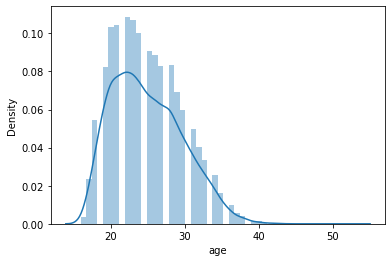

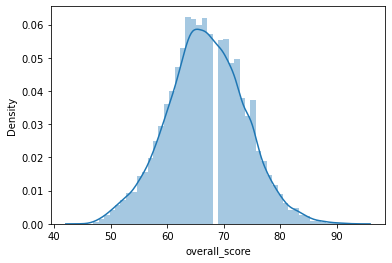

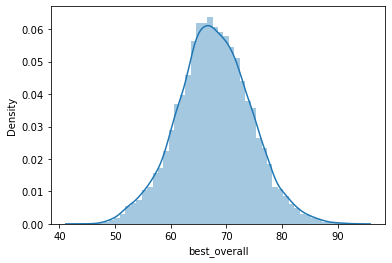

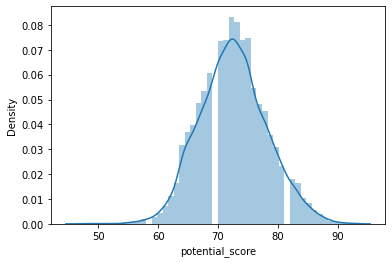

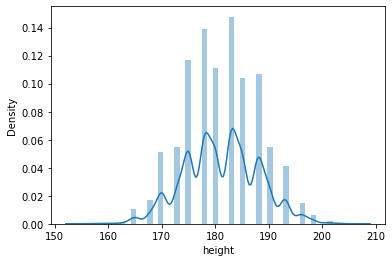

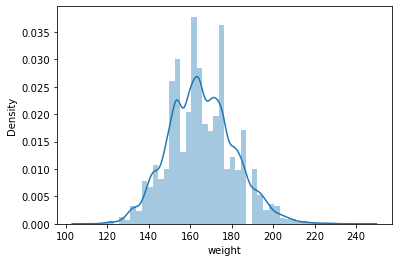

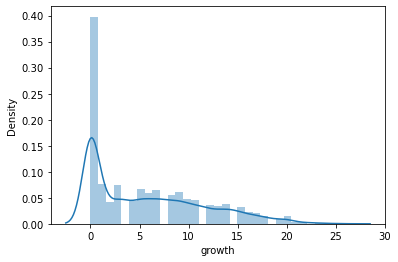

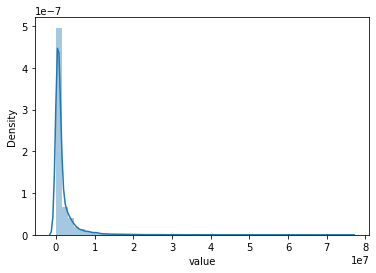

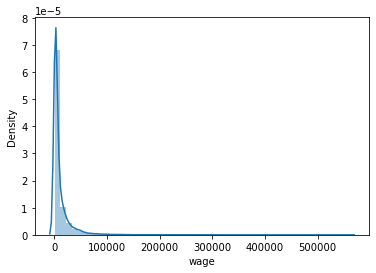

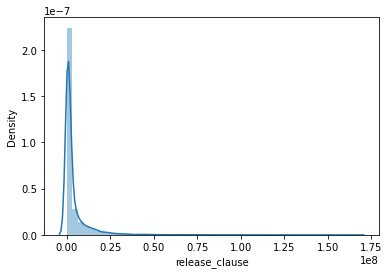

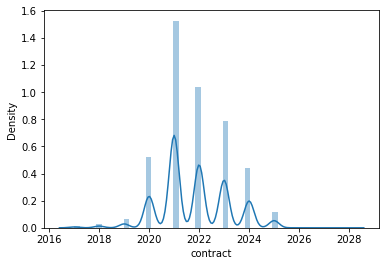

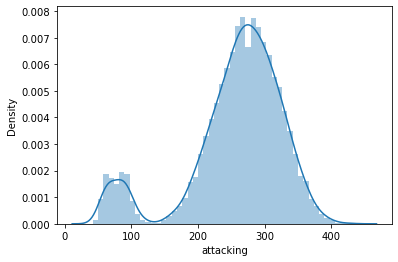

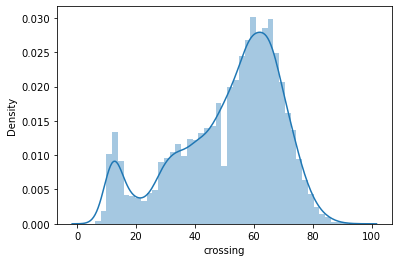

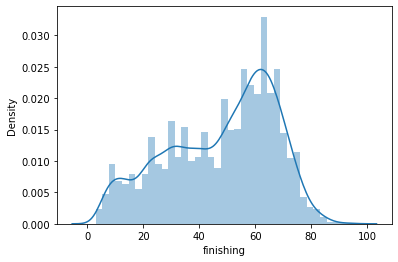

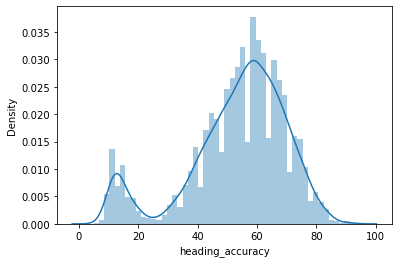

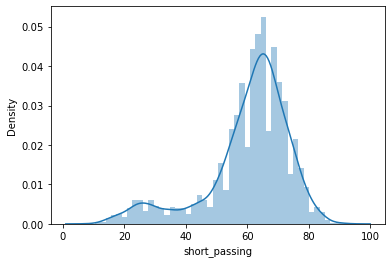

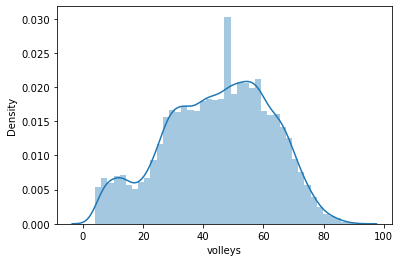

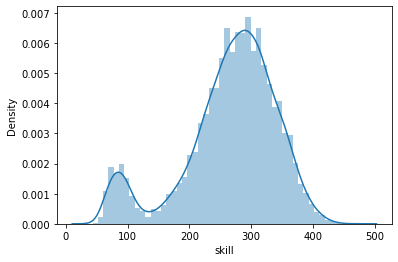

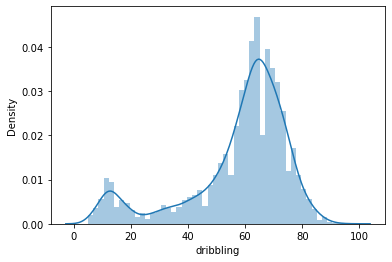

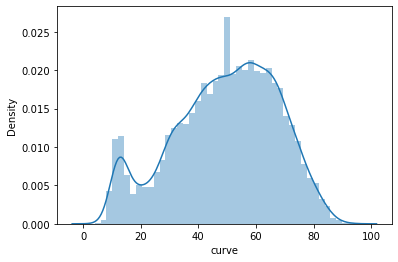

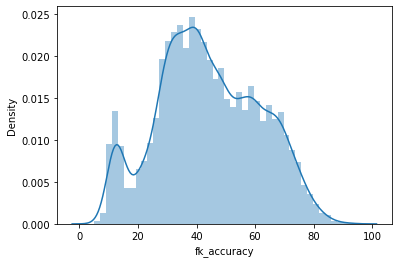

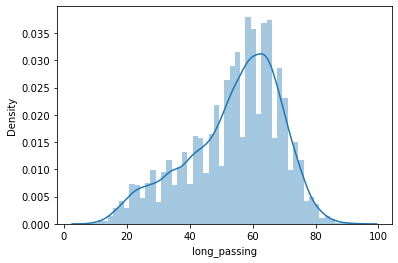

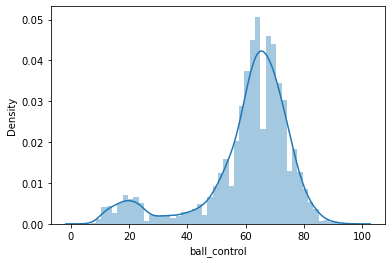

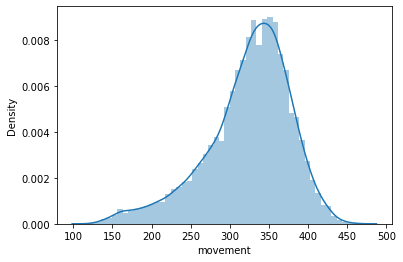

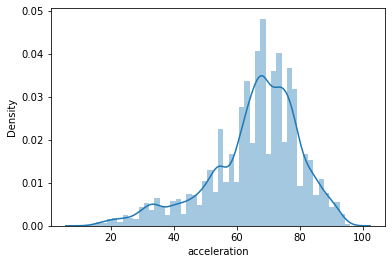

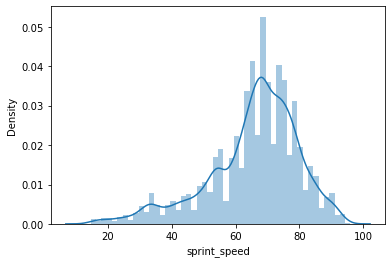

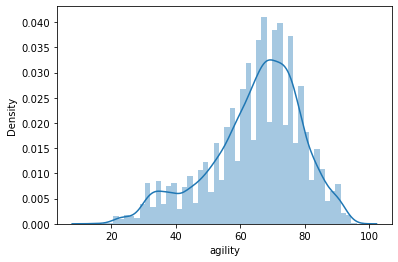

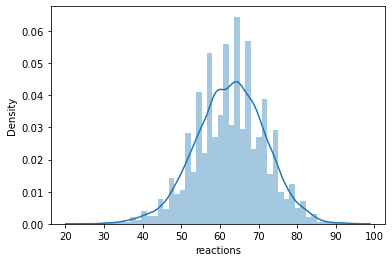

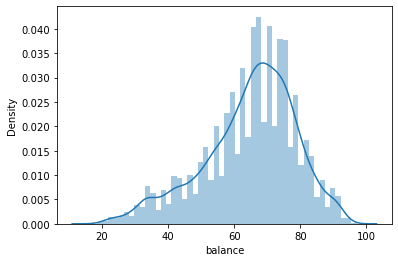

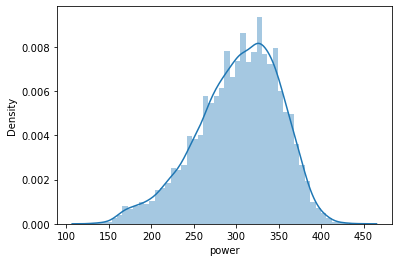

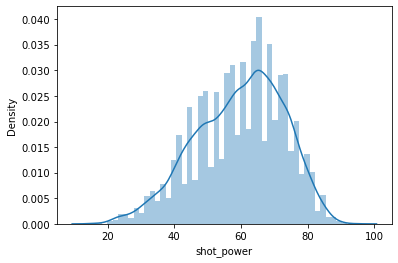

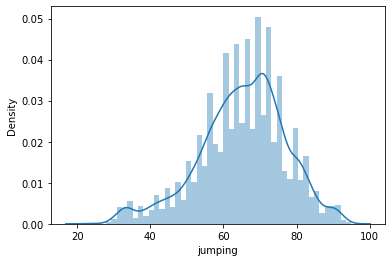

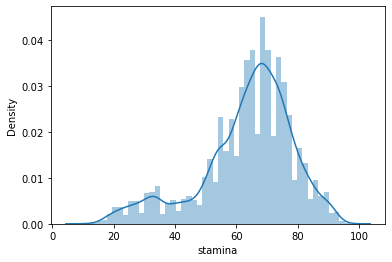

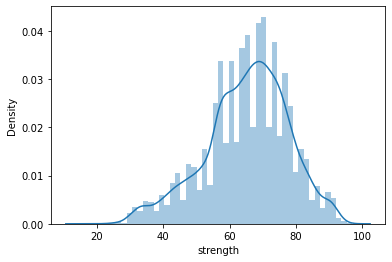

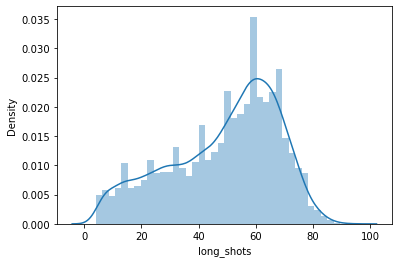

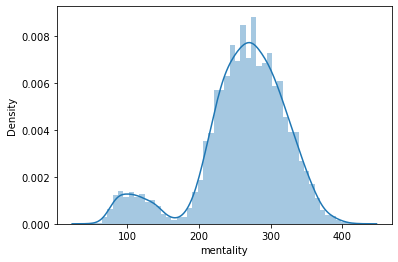

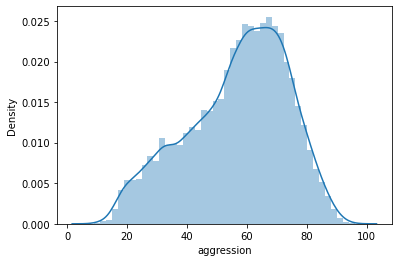

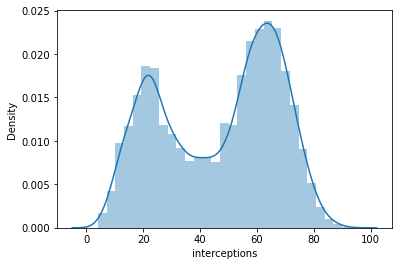

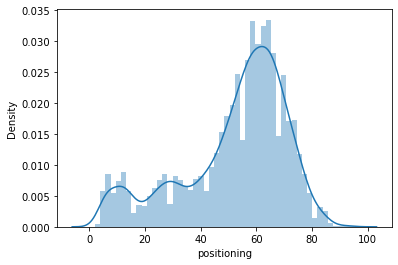

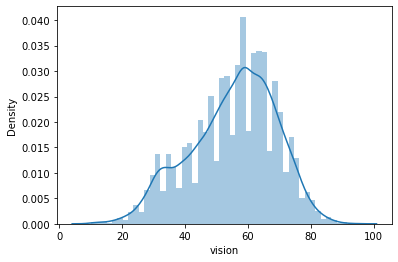

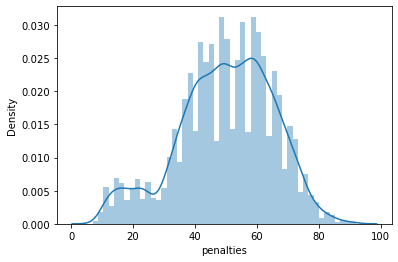

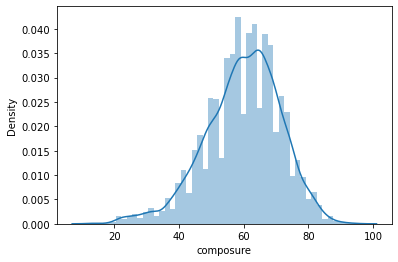

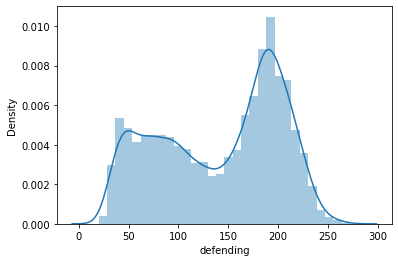

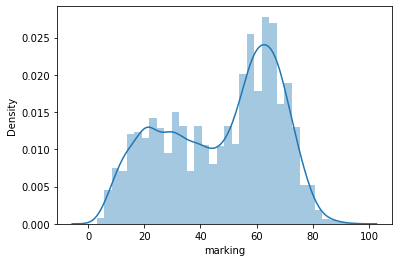

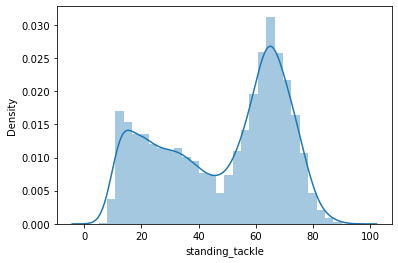

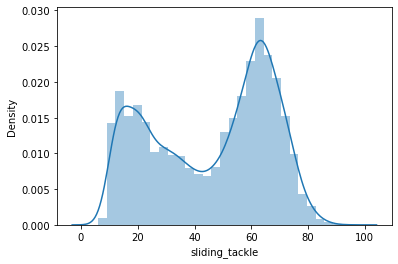

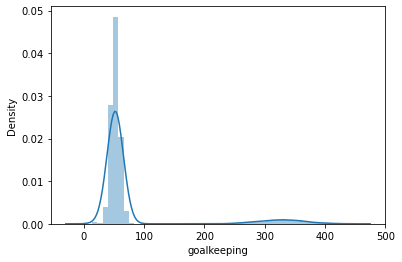

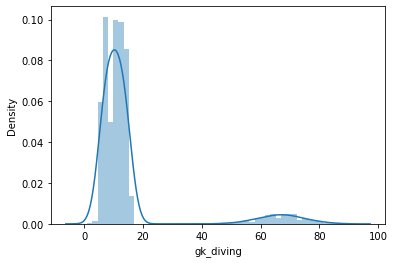

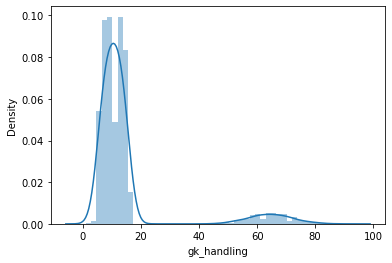

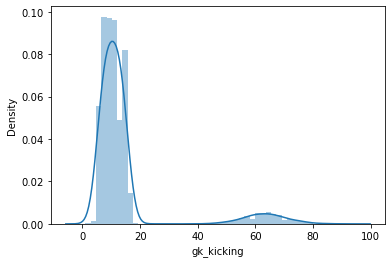

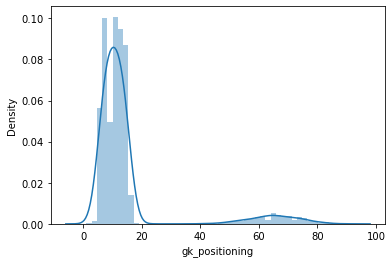

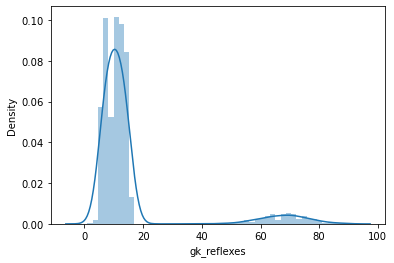

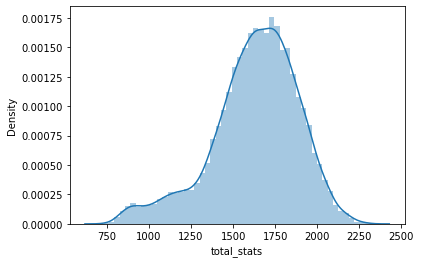

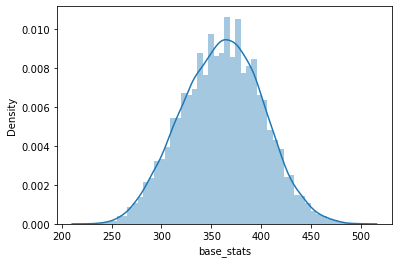

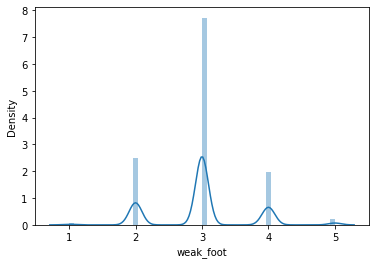

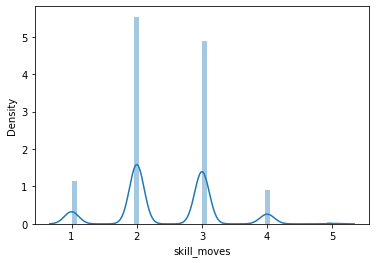

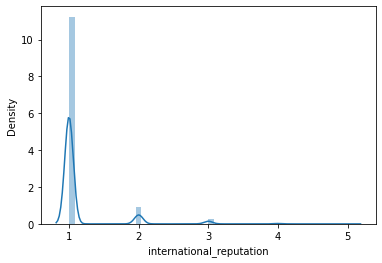

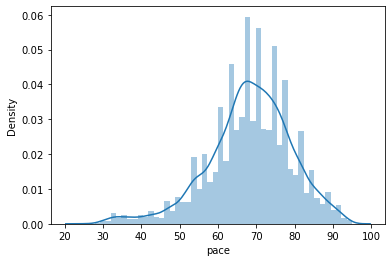

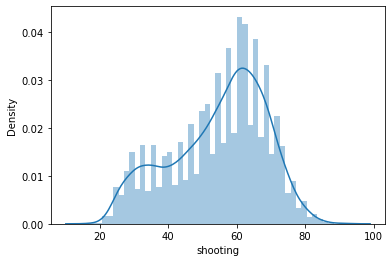

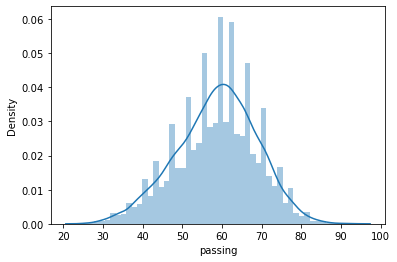

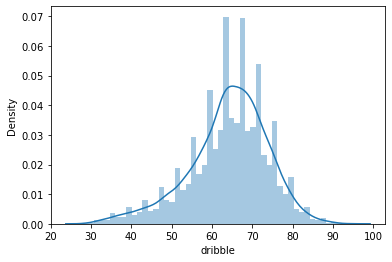

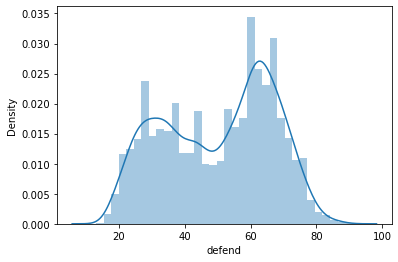

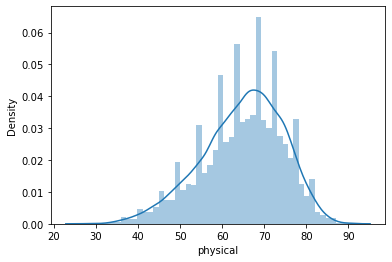

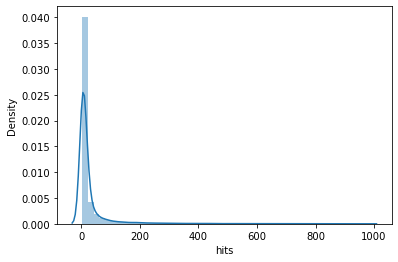

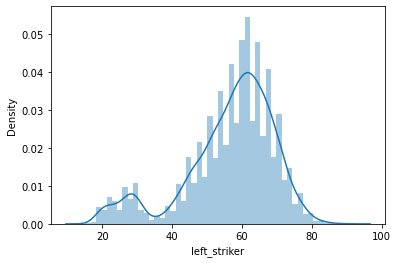

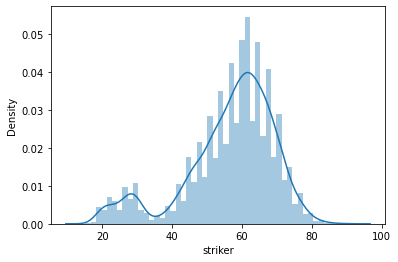

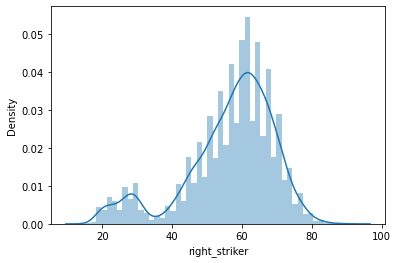

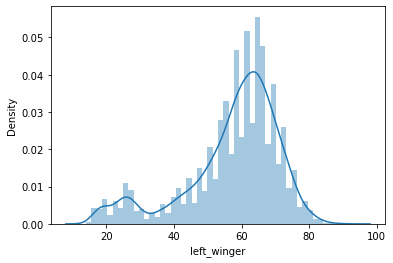

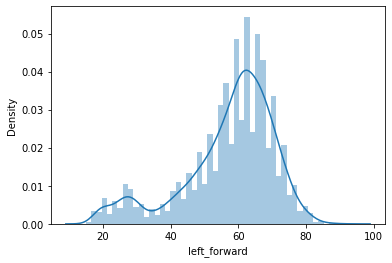

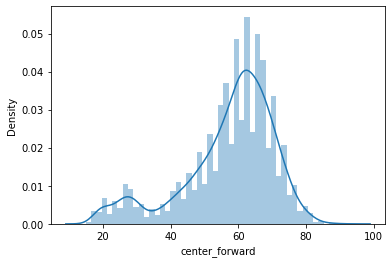

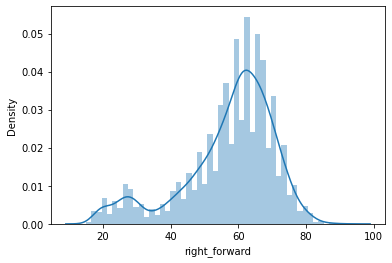

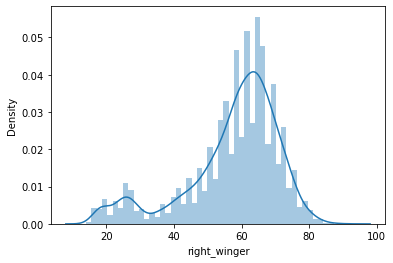

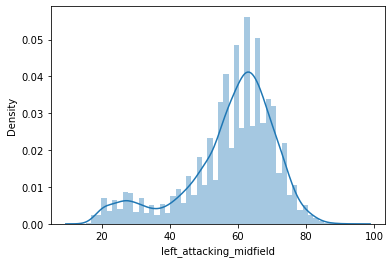

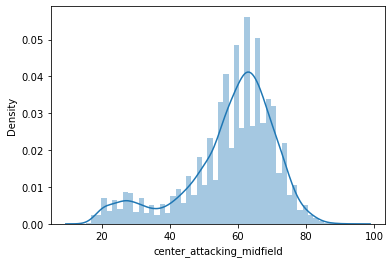

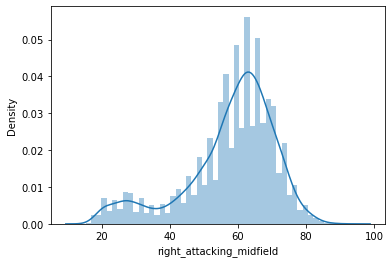

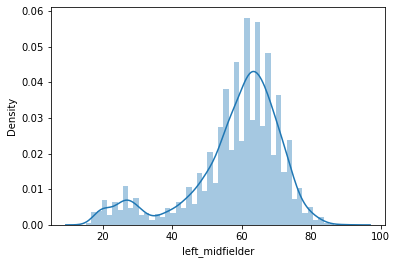

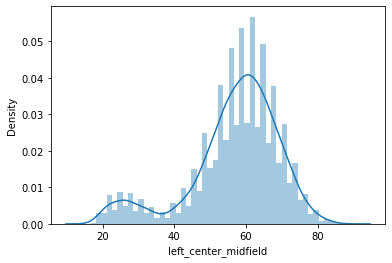

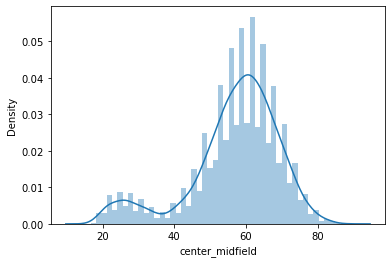

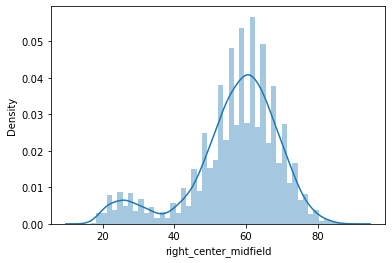

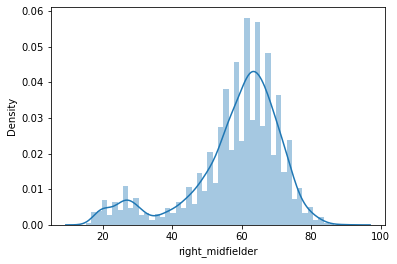

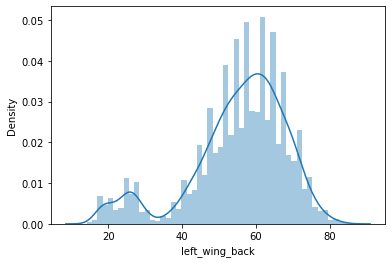

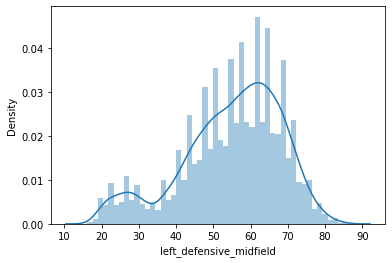

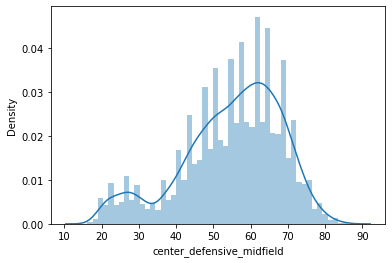

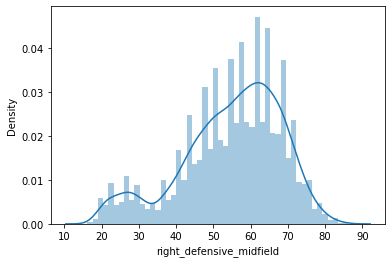

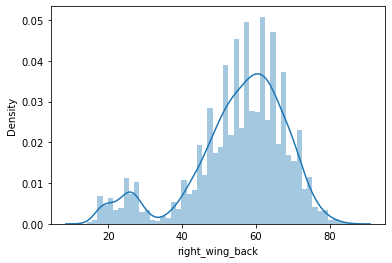

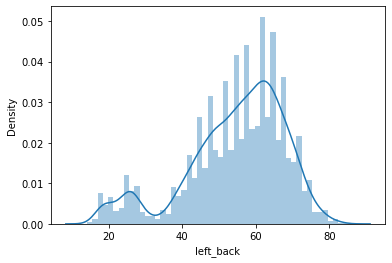

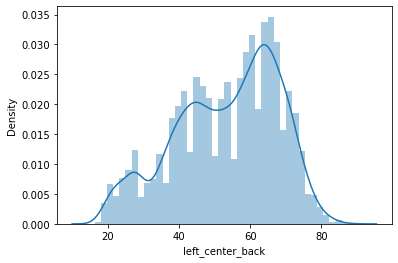

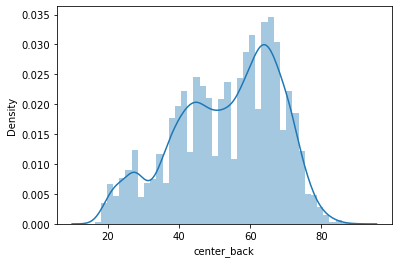

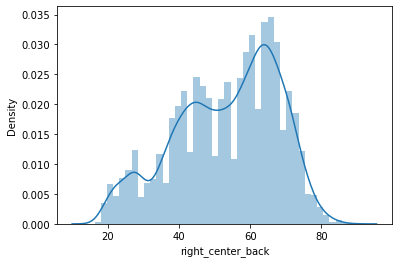

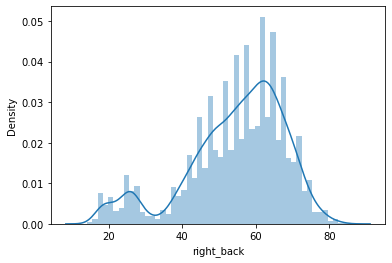

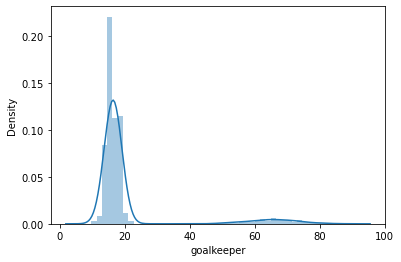

In [105]:
# we want to see the distributions
for column in num.columns:
    sns.distplot(data[column])
    plt.show()
# quite a few are actually Gaussian in shape but we'll normalize anyways and remove outliers

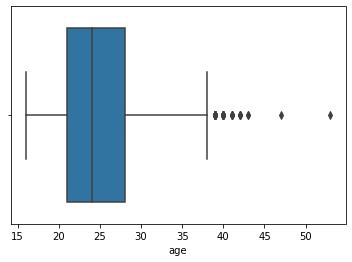

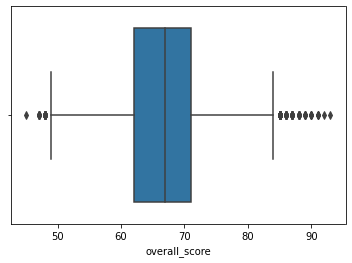

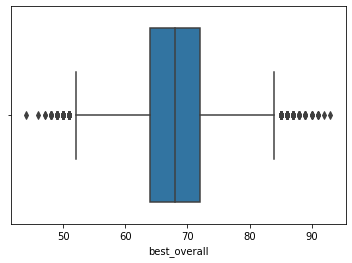

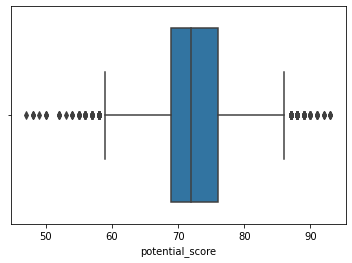

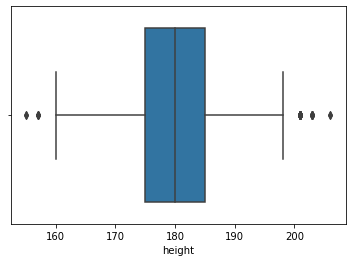

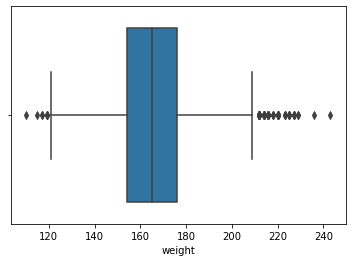

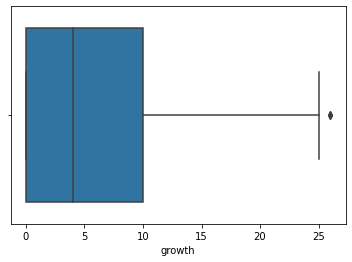

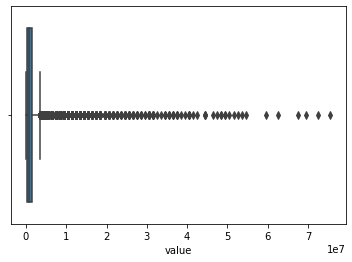

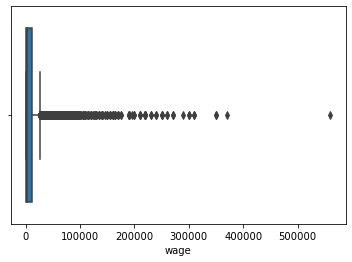

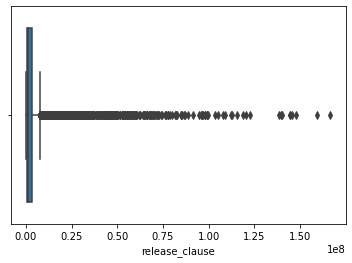

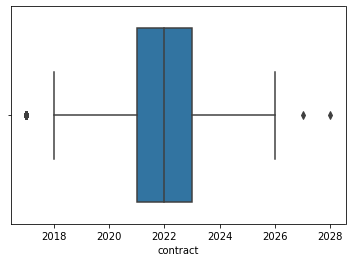

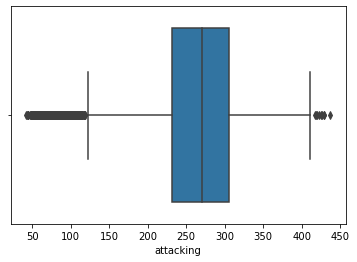

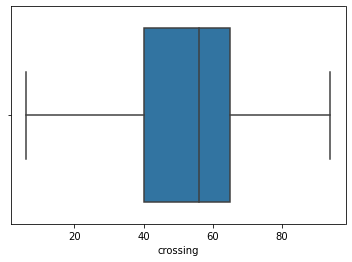

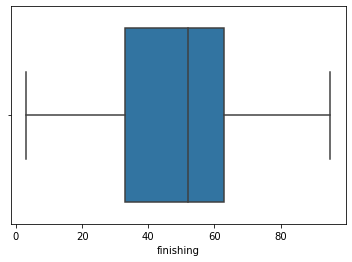

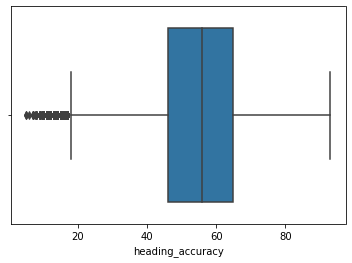

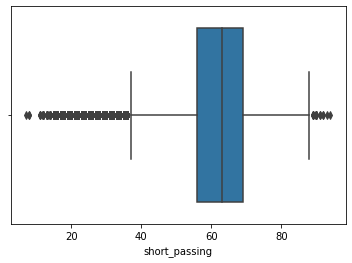

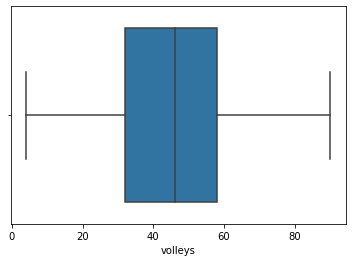

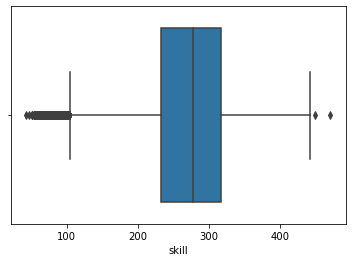

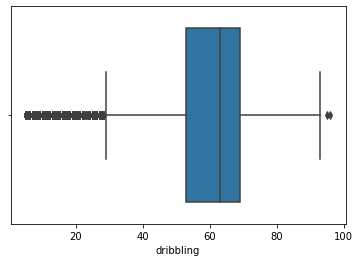

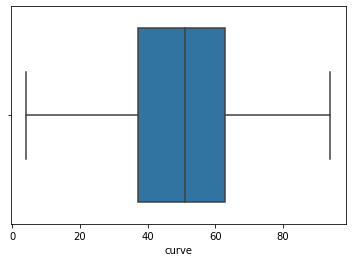

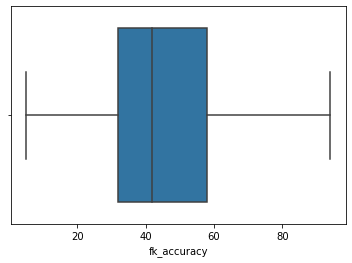

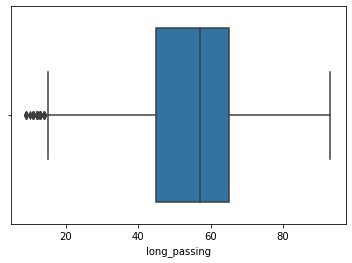

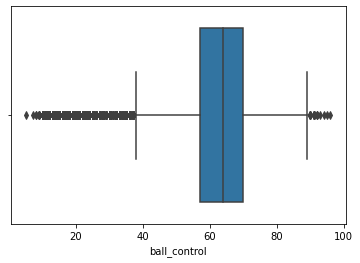

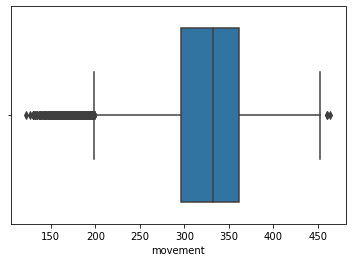

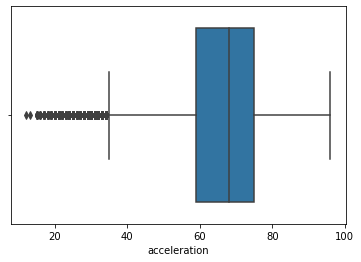

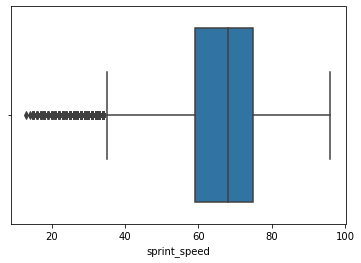

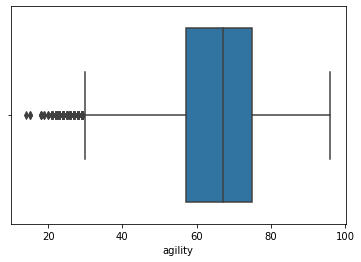

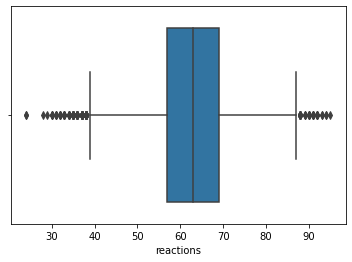

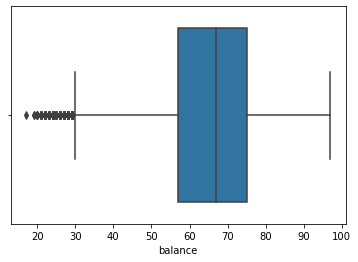

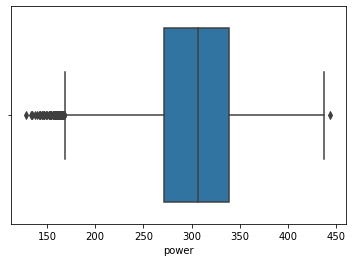

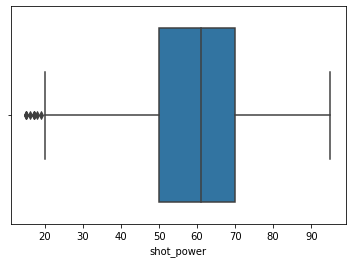

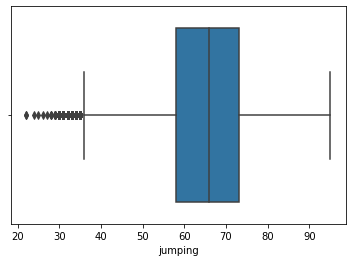

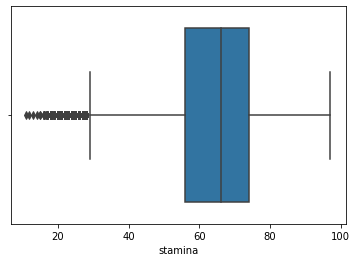

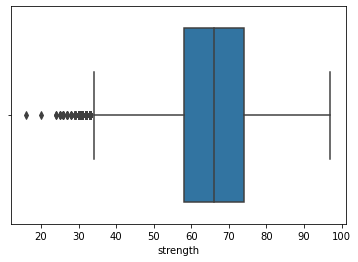

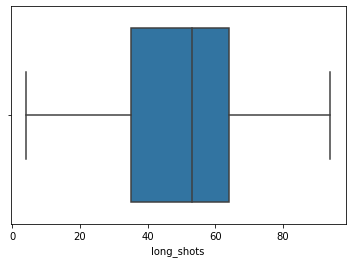

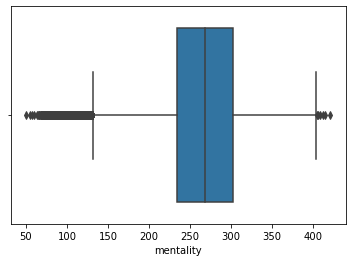

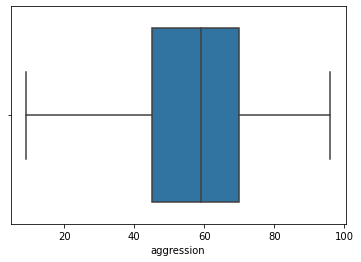

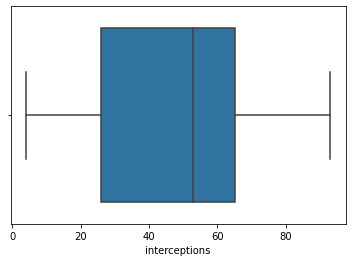

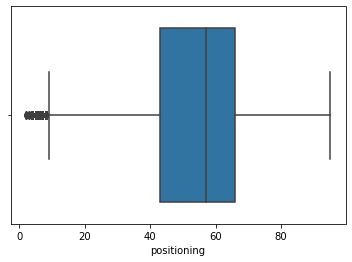

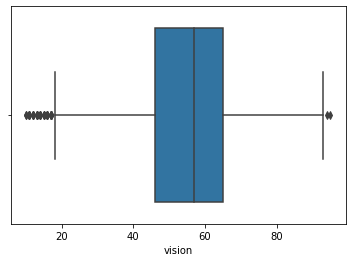

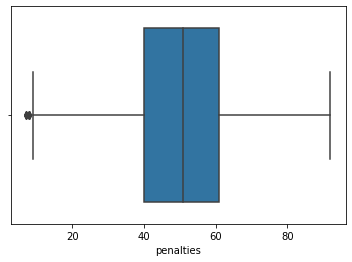

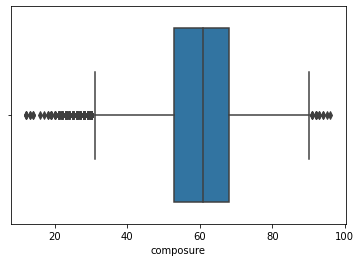

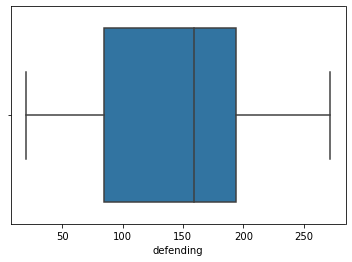

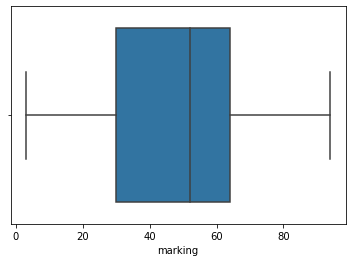

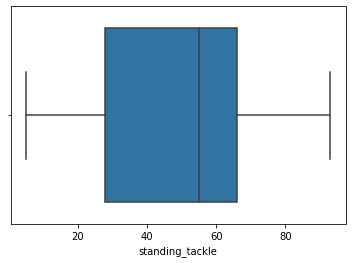

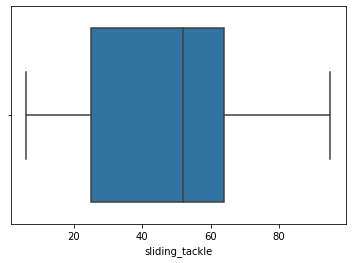

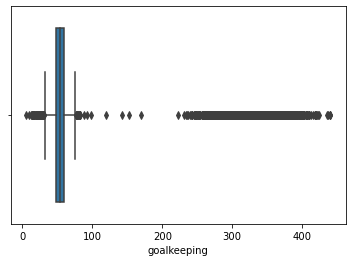

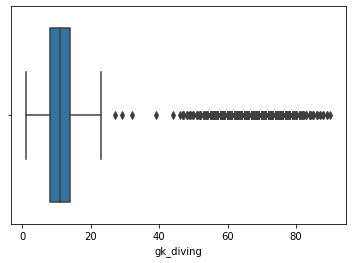

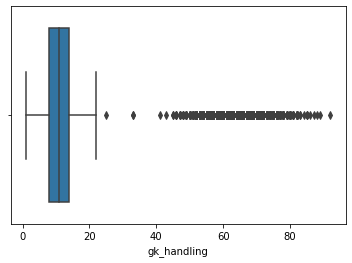

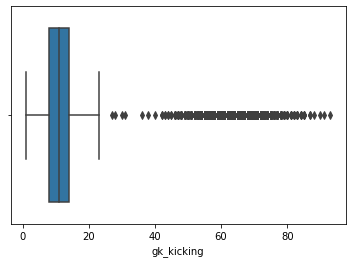

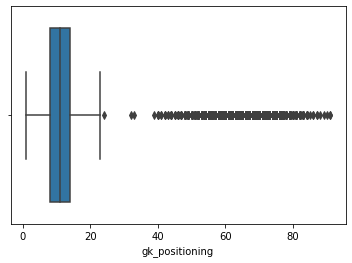

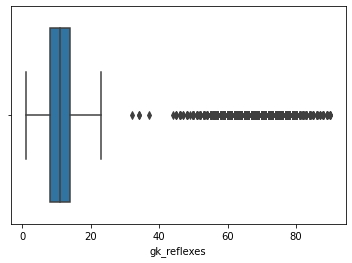

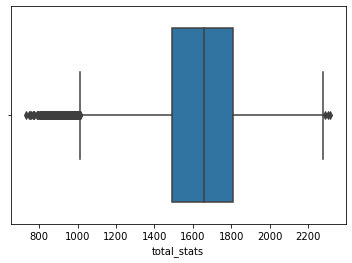

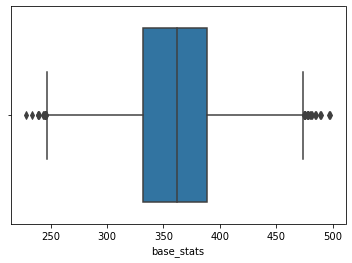

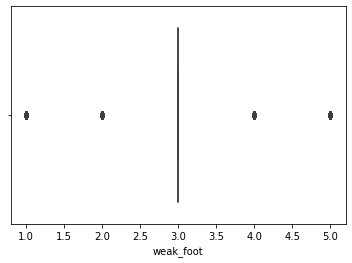

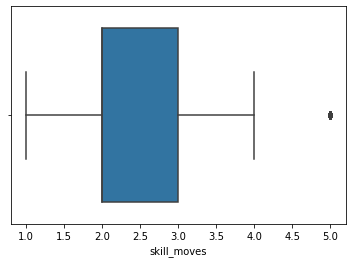

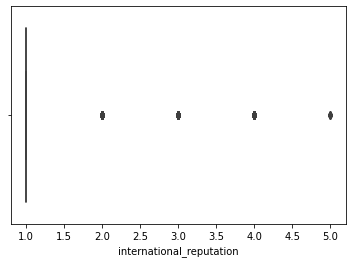

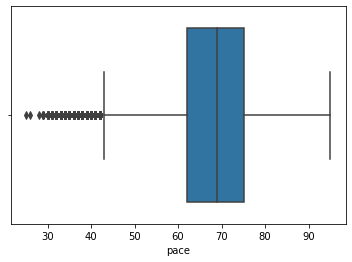

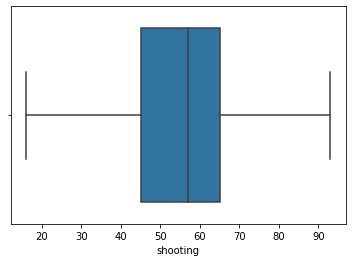

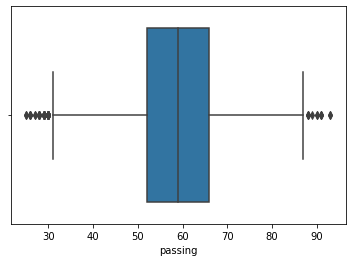

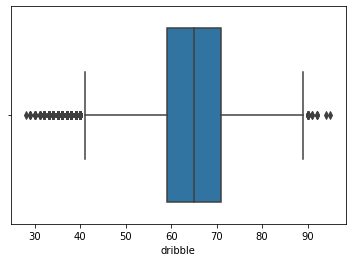

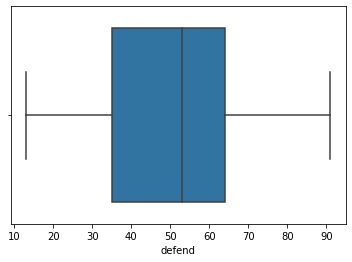

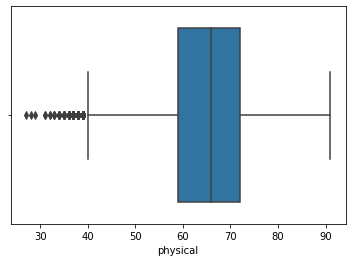

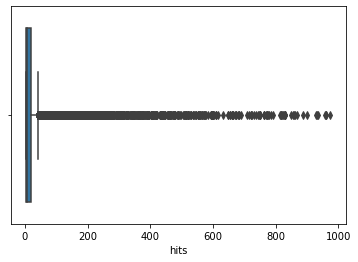

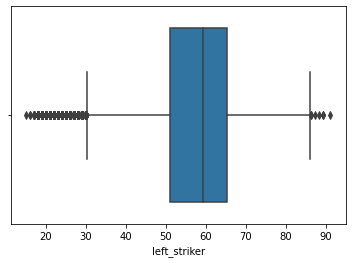

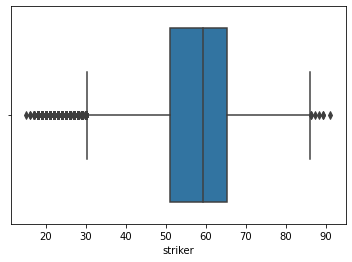

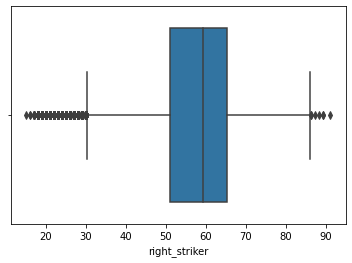

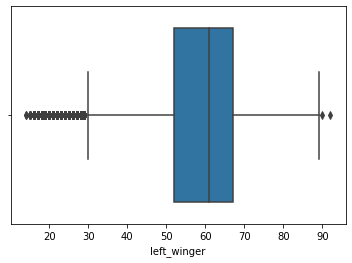

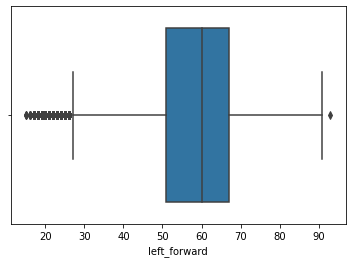

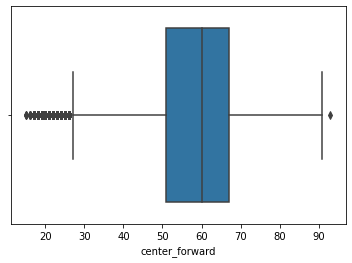

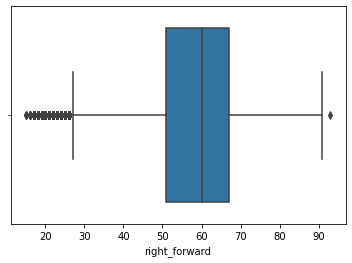

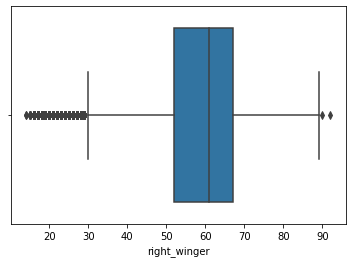

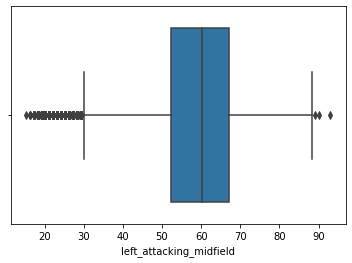

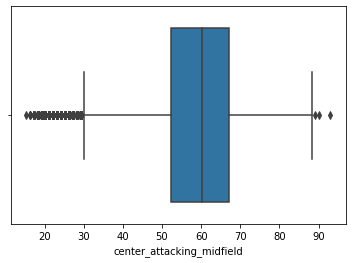

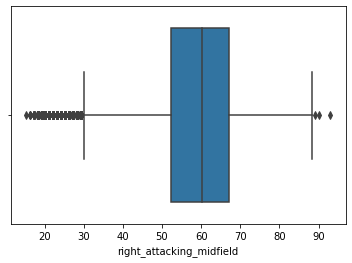

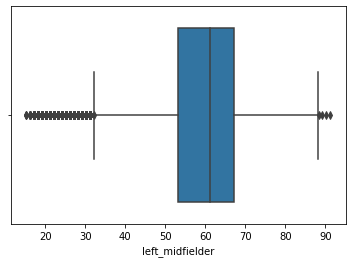

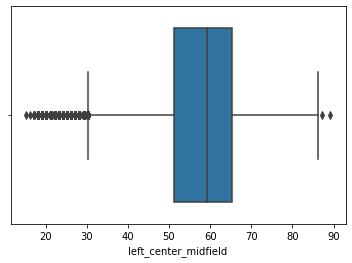

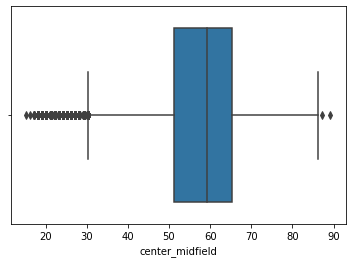

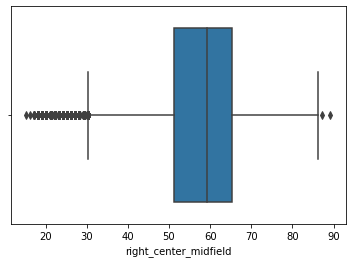

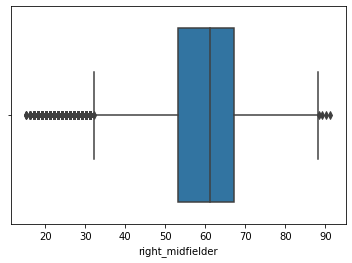

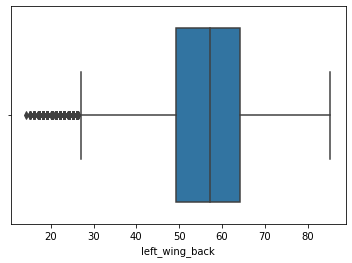

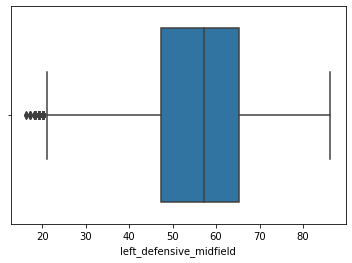

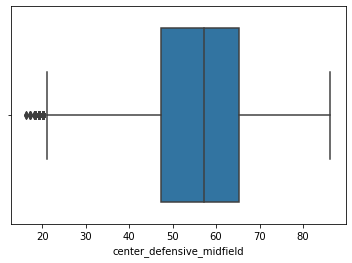

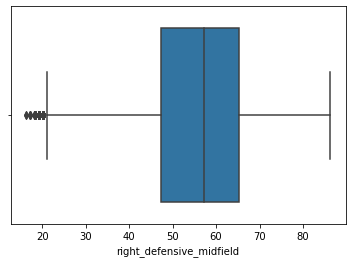

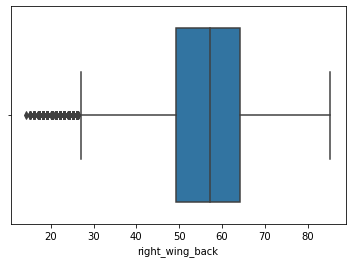

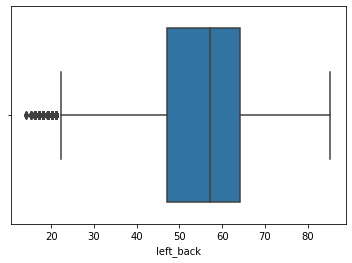

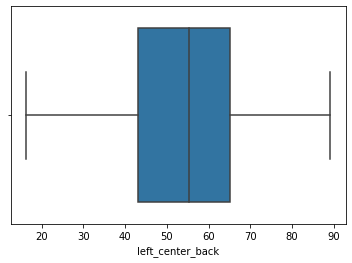

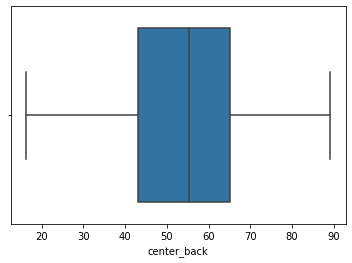

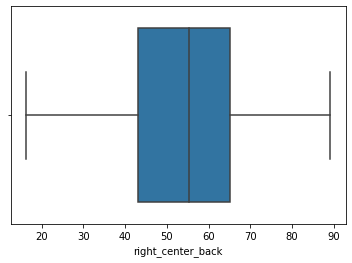

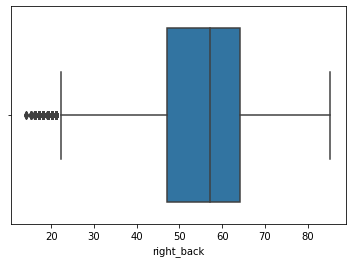

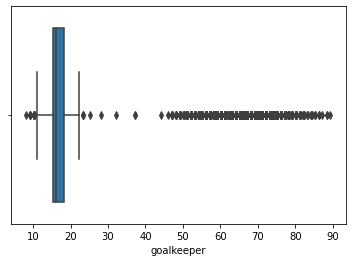

In [106]:
# Box-plot to better see the outliers
for column in num.columns:
    sns.boxplot(data[column])
    plt.show()

In [107]:
# Checking the correlations
data.corr()

age  overall_score  best_overall  potential_score  \
age                1.000000       0.535589      0.476560        -0.242108   
overall_score      0.535589       1.000000      0.986180         0.580913   
best_overall       0.476560       0.986180      1.000000         0.616233   
potential_score   -0.242108       0.580913      0.616233         1.000000   
height             0.087008       0.024519      0.014862        -0.022482   
...                     ...            ...           ...              ...   
left_center_back   0.217825       0.380666      0.405009         0.187061   
center_back        0.217825       0.380666      0.405009         0.187061   
right_center_back  0.217825       0.380666      0.405009         0.187061   
right_back         0.168157       0.411075      0.440717         0.238888   
goalkeeper         0.152040       0.102149      0.054614         0.033860   

                     height    weight    growth     value      wage  \
age                0.087008  0.247751 -0.865323  0.123158  0.224893   
overall_score      0.024519  0.152643 -0.613129  0.532629  0.601334   
best_overall       0.014862  0.135444 -0.562585  0.537586  0.600269   
potential_score   -0.022482 -0.037515  0.286844  0.455162  0.465359   
height             1.000000  0.763399 -0.050678  0.002045  0.024163   
...                     ...       ...       ...       ...       ...   
left_center_back  -0.025335  0.019020 -0.266466  0.184677  0.227250   
center_back       -0.025335  0.019020 -0.266466  0.184677  0.227250   
right_center_back -0.025335  0.019020 -0.266466  0.184677  0.227250   
right_back        -0.234683 -0.177629 -0.251956  0.216143  0.253232   
goalkeeper         0.347554  0.330523 -0.087358  0.045030  0.034401   

                   release_clause  contract  attacking  crossing  finishing  \
age                      0.119695 -0.186676   0.198793  0.162037   0.118498   
overall_score            0.595949  0.128569   0.433170  0.388628   0.303529   
best_overall             0.603452  0.166149   0.467155  0.401158   0.336438   
potential_score          0.529354  0.289643   0.227571  0.206141   0.163769   
height                   0.000543  0.007786  -0.354632 -0.492722  -0.360378   
...                           ...       ...        ...       ...        ...   
left_center_back         0.194708  0.039066   0.490260  0.490213   0.104514   
center_back              0.194708  0.039066   0.490260  0.490213   0.104514   
right_center_back        0.194708  0.039066   0.490260  0.490213   0.104514   
right_back               0.232505  0.062469   0.648650  0.698899   0.288874   
goalkeeper               0.051483  0.007938  -0.735004 -0.624053  -0.555260   

                   heading_accuracy  short_passing   volleys     skill  \
age                        0.178644       0.192717  0.194065  0.184441   
overall_score              0.303668       0.494737  0.360005  0.444243   
best_overall               0.335899       0.535988  0.386456  0.476831   
potential_score            0.130505       0.310548  0.170292  0.260200   
height                     0.061755      -0.351803 -0.333937 -0.454196   
...                             ...            ...       ...       ...   
left_center_back           0.701922       0.665247  0.193697  0.500604   
center_back                0.701922       0.665247  0.193697  0.500604   
right_center_back          0.701922       0.665247  0.193697  0.500604   
right_back                 0.665517       0.794850  0.358735  0.686163   
goalkeeper                -0.697058      -0.687006 -0.548527 -0.680356   

                   dribbling     curve  fk_accuracy  long_passing  \
age                 0.060499  0.190544     0.226468      0.233472   
overall_score       0.352438  0.398948     0.368850      0.484354   
best_overall        0.389678  0.419122     0.387421      0.517781   
potential_score     0.255591  0.215670     0.161648      0.279407   
height             -0.482249 -0.439964    -0.400317     -0.3141

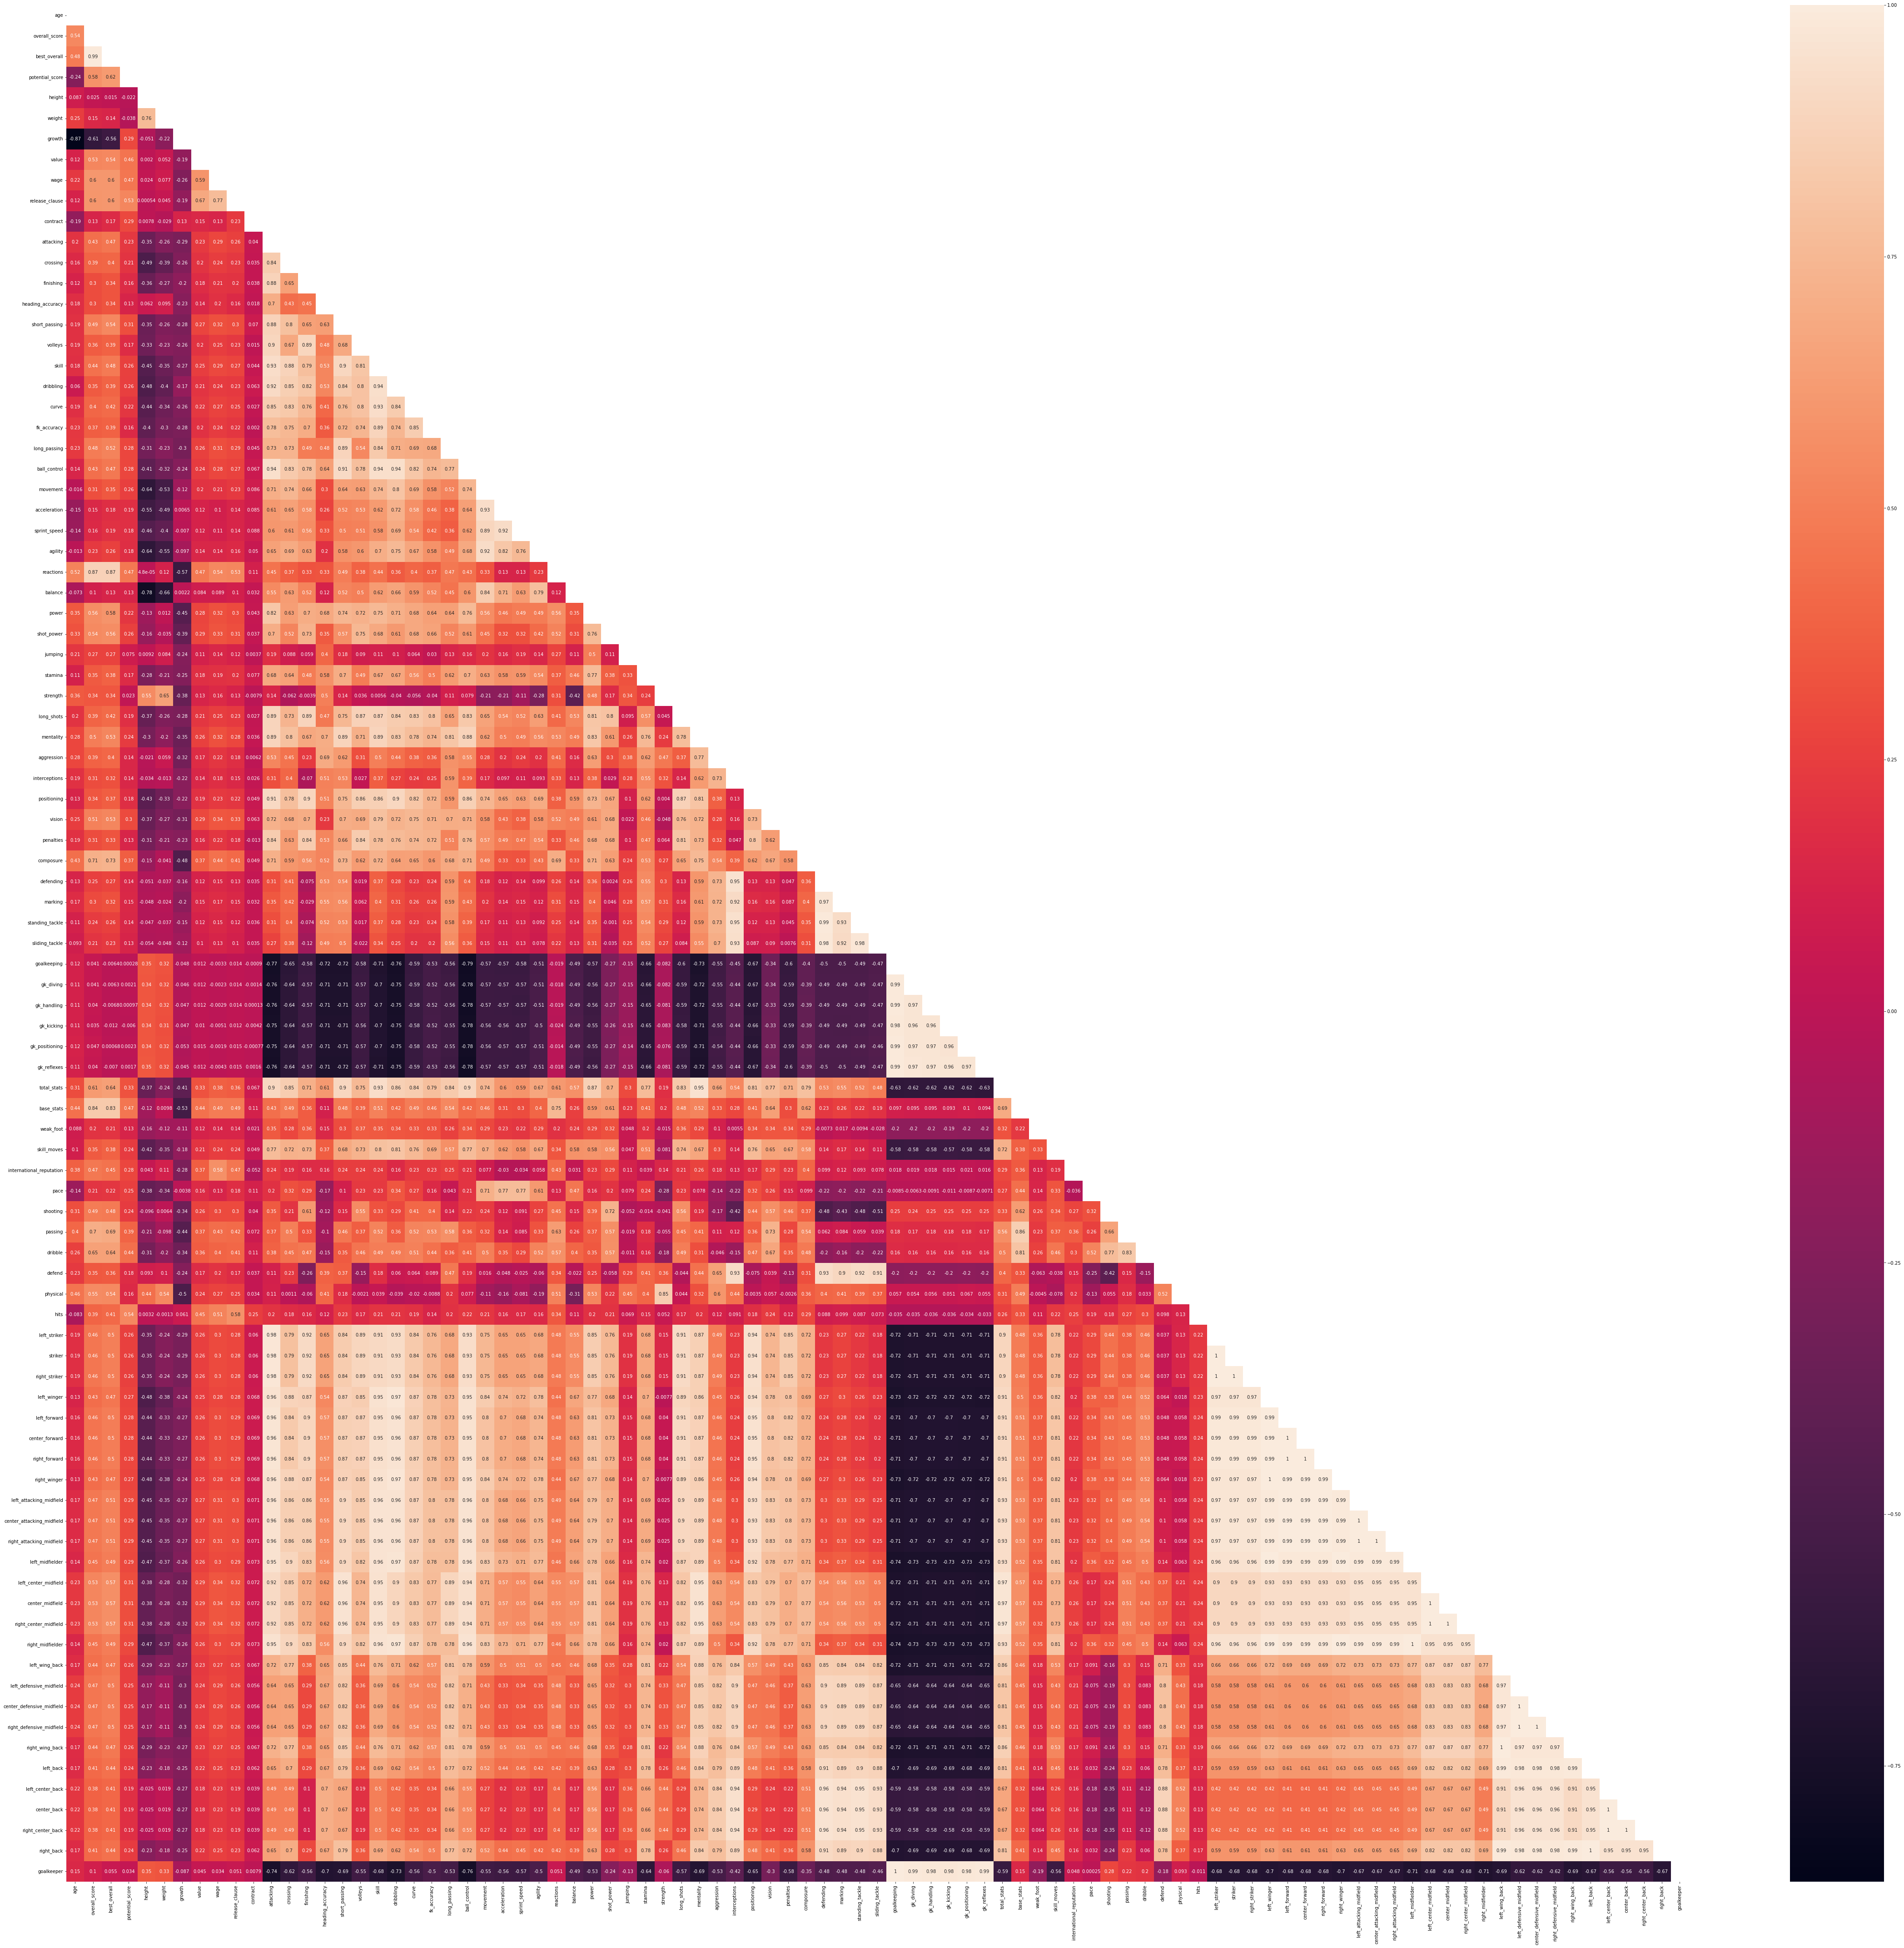

In [108]:
#HEATMAP
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(80, 76))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

# first observations:
# value, wage and release clause highly correlated to each other (around 0.6)
# postions very highly correlated (>0.95) to stats that fit positions, ie. attacking positions corrlated to attacking stats
  # => for the future rounds: 
    # positions and stats are highly correlated data:
    # repetition of exogenous variables can twist the model, will probably be dropped

In [109]:
data.head()

name  age  overall_score          nationality           club  \
id                                                                           
16     Luis García   37             71                Spain      KAS Eupen   
41         Iniesta   36             81                Spain    Vissel Kobe   
80    E. Belözoğlu   38             77               Turkey  Fenerbahçe SK   
330       R. Keane   35             80  Republic of Ireland      LA Galaxy   
1179     G. Buffon   42             82                Italy       Juventus   

      best_overall best_position    position  potential_score  height  weight  \
id                                                                              
16              70            CM  CM CAM CDM               71   178.0   143.0   
41              82           CAM      CM CAM               81   170.0   150.0   
80              77            CM      CM CDM               77   170.0   159.0   
330             81            CF          ST               80   175.0   161.0   
1179            82            GK          GK               82   193.0   203.0   

     preferred_foot  growth        joined      value     wage  release_clause  \
id                                                                              
16            Right       0  Jul 19, 2014   600000.0   7000.0       1100000.0   
41            Right       0  Jul 16, 2018  5500000.0  12000.0       7200000.0   
80             Left       0   Jul 2, 2019  2800000.0  44000.0       5300000.0   
330           Right       0   Aug 1, 2011  5500000.0  10000.0             0.0   
1179          Right       0   Jul 4, 2019  2200000.0  41000.0       3600000.0   

      contract  attacking  crossing  finishing  heading_accuracy  \
id                                                                 
16      2019.0        337        68         64                61   
41      2021.0        367        75         69                54   
80      2020.0        342        80         66                43   
330     2022.0        380        68         84                63   
1179    2021.0         95        13         15                13   

      short_passing  volleys  skill  dribbling  curve  fk_accuracy  \
id                                                                   
16               76     68.0    369         69   79.0           79   
41               90     79.0    408         85   80.0           70   
80               84     69.0    406         77   83.0           80   
330              81     84.0    374         82   82.0           63   
1179             37     17.0    122         26   20.0           13   

      long_passing  ball_control  movement  acceleration  sprint_speed  \
id                                                                       
16              71            71       305            56            50   
41              83            90       346            61            56   
80              85            81       308            54            36   
330             63            84       380            69            68   
1179            35            28       251            37            30   

      agility  reactions  balance  power  shot_power  jumping  stamina  \
id                                                                       
16       62.0         65     72.0    324          75     54.0       64   
41       79.0         75     75.0    297          67     40.0       58   
80       67.0         70     81.0    340          77     72.0       51   
330      77.0         83     83.0    363          81     62.0       72   
1179     55.0         80     49.0    243          56     71.0       34   

      strength  long_shots  mentality  aggression  interceptions  positioning  \
id                                                                              
16          60          71        362          71           71.0         72.0   
41          62          70        370          58           70.0         78.0   
8